In [1]:
#import the necessities
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import umap
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, average_precision_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [2]:
#load the data
df = pd.read_csv('D:/DSF Files/cell_train.csv')

In [20]:
#define the functions that will be used for testing
def minikmeans_test(clusters, batch):
    cluster = MiniBatchKMeans(random_state=357,
        init='random', n_clusters=clusters, batch_size=batch)
    cluster.fit(X)
    y_pred = cluster.predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def kmeans_test(n):
    cluster = KMeans(n_clusters=n, random_state=357)
    cluster.fit(X)
    y_pred = cluster.predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def dbscan_test(epsilon, samples):
    cluster = DBSCAN(eps = epsilon, min_samples = samples)
    y_pred = cluster.fit_predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))

def gmm_test(n):
    cluster = GaussianMixture(n_components=n, random_state=357)
    y_pred = cluster.fit_predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def agg_test(link, n):
    cluster = AgglomerativeClustering(linkage=link, affinity='euclidean', n_clusters=n)
    y_pred = cluster.fit_predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def pca_test(data):
    for n in range(2, len(data.columns)):
        pca = PCA(n_components=n).fit(X)
        print('Variance explained by {} components: {:0.2f}'.format(n, (pca.explained_variance_ratio_).sum()))
        
def tsne_test(n, p):
    tsne = TSNE(n_components=n, verbose=0, perplexity=p, n_iter=300, n_jobs=-1)
    tsne_results = tsne.fit_transform(X)
    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    
def umap_test(n, d):
    umap_results = umap.UMAP(n_neighbors=n, min_dist=d,
                      metric='correlation').fit_transform(X)
    print('Parameters: {}, {}'.format(n, d))
    plt.figure(figsize=(10,5))
    plt.scatter(umap_results[:, 0], umap_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    
def dbscan_opt(n):
    neigh = NearestNeighbors(n_neighbors=n)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.figure(figsize=(15,10))
    plt.ylim([0, 5])
    plt.plot(distances);
    
def agg_opt():
    plt.figure(figsize=(20,10))
    plt.title("Dendrogram with linkage method: average")
    dendrogram(linkage(X, method='average'))
    plt.show()
    plt.figure(figsize=(20,10))
    plt.title("Dendrogram with linkage method: complete")
    dendrogram(linkage(X, method='complete'))
    plt.show()
    plt.figure(figsize=(20,10))
    plt.title("Dendrogram with linkage method: ward")
    dendrogram(linkage(X, method='ward'))
    plt.show()

In [4]:
#check the df
display(df.head())
display(df.info())

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

None

In [5]:
objects = []
for i in range(len(df.columns)):
    if df.iloc[:, i].dtype == 'object':
        objects.append(i)
for i in objects:
    print('\nColumn number: {}'.format(i))
    display(df.iloc[:, i].value_counts())


Column number: 1


No     36336
Yes    14711
Name: Churn, dtype: int64


Column number: 26


NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
PHIBRI856       1
OHIRAV330       1
SFRSGS530       1
PITSOM814       1
LAUNAT601       1
Name: ServiceArea, Length: 747, dtype: int64


Column number: 32


No     38679
Yes    12368
Name: ChildrenInHH, dtype: int64


Column number: 33


No     43956
Yes     7091
Name: HandsetRefurbished, dtype: int64


Column number: 34


Yes    46046
No      5001
Name: HandsetWebCapable, dtype: int64


Column number: 35


No     41524
Yes     9523
Name: TruckOwner, dtype: int64


Column number: 36


No     46894
Yes     4153
Name: RVOwner, dtype: int64


Column number: 37


Known      33987
Unknown    17060
Name: Homeownership, dtype: int64


Column number: 38


No     32596
Yes    18451
Name: BuysViaMailOrder, dtype: int64


Column number: 39


No     31821
Yes    19226
Name: RespondsToMailOffers, dtype: int64


Column number: 40


No     50295
Yes      752
Name: OptOutMailings, dtype: int64


Column number: 41


No     48168
Yes     2879
Name: NonUSTravel, dtype: int64


Column number: 42


No     41583
Yes     9464
Name: OwnsComputer, dtype: int64


Column number: 43


Yes    34503
No     16544
Name: HasCreditCard, dtype: int64


Column number: 46


No     41223
Yes     9824
Name: NewCellphoneUser, dtype: int64


Column number: 47


No     44012
Yes     7035
Name: NotNewCellphoneUser, dtype: int64


Column number: 50


No     50368
Yes      679
Name: OwnsMotorcycle, dtype: int64


Column number: 52


Unknown    28982
30          7328
150         4115
130         2105
80          1960
10          1928
60          1776
200         1266
100         1235
40           249
400           46
250           20
300           13
180           10
500            8
240            6
Name: HandsetPrice, dtype: int64


Column number: 53


No     49302
Yes     1745
Name: MadeCallToRetentionTeam, dtype: int64


Column number: 54


2-High       18993
1-Highest     8522
3-Good        8410
5-Low         6499
4-Medium      5357
7-Lowest      2114
6-VeryLow     1152
Name: CreditRating, dtype: int64


Column number: 55


Other       24655
Suburban    16378
Town         7589
Rural        2425
Name: PrizmCode, dtype: int64


Column number: 56


Other           37637
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: Occupation, dtype: int64


Column number: 57


Unknown    19700
Yes        18651
No         12696
Name: MaritalStatus, dtype: int64

Drop CustomerID, ServiceArea, Homeownership?, NewCellphoneUser / NotNewCellphoneUser, HandsetPrice, PrizmCode, Occupation, MaritalStatus<br>
CustomerID because it serves only as an identifier and the index value will serve that purpose for us.<br>
ServiceArea because there are several 1 columns and the data is nominal.<br>
Homeownership because it is categorized between known and unknown, meaning the data would likely be prone to error.<br>
NewCellphoneUser and NotNewCellphoneUser seems to be contradictory in terms of data.<br>
HandsetPrice because it has 'Unknown' as a value for over half of the data and filling in the data with '0' would skew the data and interpolation is difficult if not impossible.<br>
PrizmCode because it has a value of 'Other' that is about half of the data and the data is nominal.<br>
Occupation because it has a value of other that is about three-quarters of the data and the data is nominal.<br>
MaritalStatus because it has a value of other that is about two-fifths of the data and the data is nominal.<br><br>

Convert Churn, ChildrenInHH, HandsetRefurbished, HandsetWebCapable, TruckOwner, RVOwner, BuysViaMailOrder, RespondsToMailOffers, OptOutMailings, NonUSTravel, OwnsComputer, HasCreditCard, OwnsMotorcycle, MadeCallToRetentionTeam, CreditRating to binary values<br>
*Credit rating will be based on Good or Better

In [6]:
dummy = df.copy()
names = []
for i in objects:
    if len(dummy.iloc[:, i].value_counts()) > 2:
        names.append(dummy.columns[i])
names.append('Homeownership')
names.append('NewCellphoneUser')
names.append('NotNewCellphoneUser')
dummy = dummy.select_dtypes(include=object)
for name in names:
    del dummy[name]
dummy['HighestCredit'] = np.where(df['CreditRating'].str.contains('1'), 1, 0)
dummy['BetterCredit'] = np.where(df['CreditRating'].str.contains('2'), 1, 0)
dummy['GoodCredit'] = np.where(df['CreditRating'].str.contains('3'), 1, 0)
dummy['Has Good Credit'] = (dummy['HighestCredit'] + dummy['BetterCredit'] + dummy['GoodCredit'])
dummy.head()

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,OwnsMotorcycle,MadeCallToRetentionTeam,HighestCredit,BetterCredit,GoodCredit,Has Good Credit
0,Yes,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,1,0,0,1
1,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,0,0,0,0
2,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,0,0,1,1
3,No,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,0,0,0,0
4,Yes,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,1,0,0,1


In [7]:
dummy['Has Children'] = np.where(dummy['ChildrenInHH'].str.contains('Yes'), 1, 0)
dummy['Handset Refurbished'] = np.where(dummy['HandsetRefurbished'].str.contains('Yes'), 1, 0)
dummy['Handset Web Capable'] = np.where(dummy['HandsetWebCapable'].str.contains('Yes'), 1, 0)
dummy['Has Truck'] = np.where(dummy['TruckOwner'].str.contains('Yes'), 1, 0)
dummy['Has RV'] = np.where(dummy['RVOwner'].str.contains('Yes'), 1, 0)
dummy['Used Mail Order'] = np.where(dummy['BuysViaMailOrder'].str.contains('Yes'), 1, 0)
dummy['Uses Mail Offers'] = np.where(dummy['RespondsToMailOffers'].str.contains('Yes'), 1, 0)
dummy['Gets Mail Offers'] = np.where(dummy['OptOutMailings'].str.contains('No'), 1, 0)
dummy['Non-US Travel'] = np.where(dummy['NonUSTravel'].str.contains('Yes'), 1, 0)
dummy['Has Computer'] = np.where(dummy['OwnsComputer'].str.contains('Yes'), 1, 0)
dummy['Gas Credit Card'] = np.where(dummy['HasCreditCard'].str.contains('Yes'), 1, 0)
dummy['Has Motorcycle'] = np.where(dummy['OwnsMotorcycle'].str.contains('Yes'), 1, 0)
dummy['CalledRetention'] = np.where(dummy['MadeCallToRetentionTeam'].str.contains('Yes'), 1, 0)
dummy['Churn'] = np.where(dummy['Churn'].str.contains('Yes'), 1, 0)
dummy = dummy.select_dtypes(exclude=object)
dummy = dummy.drop(['HighestCredit', 'BetterCredit', 'GoodCredit'], 1)

In [8]:
model = df.select_dtypes(exclude=object)
model = model.dropna()
model = model.merge(dummy, left_index=True, right_index=True)
del model['CustomerID']
model.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Has Truck,Has RV,Used Mail Order,Uses Mail Offers,Gets Mail Offers,Non-US Travel,Has Computer,Gas Credit Card,Has Motorcycle,CalledRetention
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,1,1,1,0,1,1,0,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,0,1,1,1,0,1,1,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,0,1,1,1,0,0,1,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,1,1,1,0,1,1,0,0


In [9]:
#seperate the target variable from the rest
y = model['Churn']
X = model.drop(['Churn'], 1)
#scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
pca_test(model)

Variance explained by 2 components: 0.28
Variance explained by 3 components: 0.34
Variance explained by 4 components: 0.38
Variance explained by 5 components: 0.42
Variance explained by 6 components: 0.46
Variance explained by 7 components: 0.49
Variance explained by 8 components: 0.52
Variance explained by 9 components: 0.55
Variance explained by 10 components: 0.58
Variance explained by 11 components: 0.60
Variance explained by 12 components: 0.62
Variance explained by 13 components: 0.64
Variance explained by 14 components: 0.66
Variance explained by 15 components: 0.68
Variance explained by 16 components: 0.70
Variance explained by 17 components: 0.72
Variance explained by 18 components: 0.74
Variance explained by 19 components: 0.76
Variance explained by 20 components: 0.78
Variance explained by 21 components: 0.80
Variance explained by 22 components: 0.81
Variance explained by 23 components: 0.83
Variance explained by 24 components: 0.84
Variance explained by 25 components: 0.86


In [10]:
pca = PCA(n_components=33)
X = pca.fit_transform(X)

In [48]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    kmeans_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.27
ARI score: -0.01

Number of clusters: 3
AUPRC score: 0.28
Silhouette score: 0.11
ARI score: -0.00

Number of clusters: 4
AUPRC score: 0.28
Silhouette score: 0.12
ARI score: 0.00

Number of clusters: 5
AUPRC score: 0.30
Silhouette score: 0.11
ARI score: 0.00

Number of clusters: 6
AUPRC score: 0.28
Silhouette score: 0.07
ARI score: 0.00

Number of clusters: 7
AUPRC score: 0.27
Silhouette score: 0.08
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.28
Silhouette score: 0.08
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.31
Silhouette score: 0.08
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.30
Silhouette score: 0.09
ARI score: 0.00


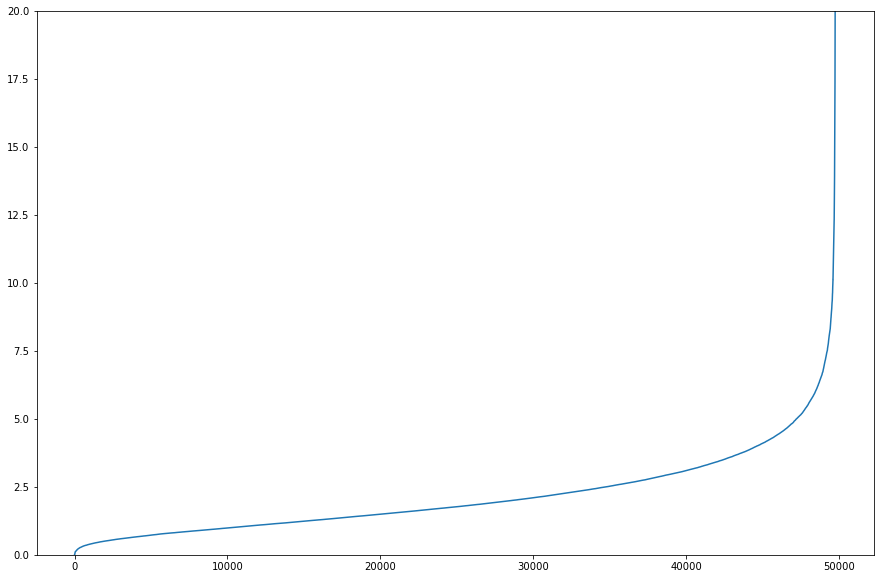

In [27]:
dbscan_opt(2)

In [32]:
for i in range(1, 11):
    t0 = time.time()
    dbscan_test(3,i*50)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.\n'.format(total))

AUPRC score: 0.29
Silhouette score: -0.01
ARI score: 0.01
Total time: 47.30327367782593 seconds.
AUPRC score: 0.29
Silhouette score: -0.02
ARI score: 0.01
Total time: 49.807339668273926 seconds.
AUPRC score: 0.29
Silhouette score: -0.04
ARI score: 0.01
Total time: 48.6235511302948 seconds.
AUPRC score: 0.29
Silhouette score: -0.06
ARI score: 0.01
Total time: 37.216050148010254 seconds.
AUPRC score: 0.29
Silhouette score: -0.04
ARI score: 0.00
Total time: 49.40314078330994 seconds.
AUPRC score: 0.29
Silhouette score: -0.06
ARI score: 0.00
Total time: 54.68418097496033 seconds.
AUPRC score: 0.29
Silhouette score: -0.04
ARI score: 0.00
Total time: 52.2985782623291 seconds.
AUPRC score: 0.29
Silhouette score: -0.06
ARI score: 0.00
Total time: 48.432446241378784 seconds.
AUPRC score: 0.28
Silhouette score: 0.05
ARI score: -0.00
Total time: 47.9771044254303 seconds.
AUPRC score: 0.28
Silhouette score: 0.05
ARI score: -0.00
Total time: 48.84974908828735 seconds.


In [49]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    gmm_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.21
ARI score: 0.00

Number of clusters: 3
AUPRC score: 0.29
Silhouette score: 0.09
ARI score: -0.00

Number of clusters: 4
AUPRC score: 0.28
Silhouette score: 0.07
ARI score: 0.00

Number of clusters: 5
AUPRC score: 0.29
Silhouette score: 0.03
ARI score: -0.00

Number of clusters: 6
AUPRC score: 0.29
Silhouette score: 0.03
ARI score: -0.00

Number of clusters: 7
AUPRC score: 0.28
Silhouette score: 0.04
ARI score: -0.00

Number of clusters: 8
AUPRC score: 0.30
Silhouette score: 0.00
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.30
Silhouette score: 0.03
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.29
Silhouette score: 0.02
ARI score: 0.00


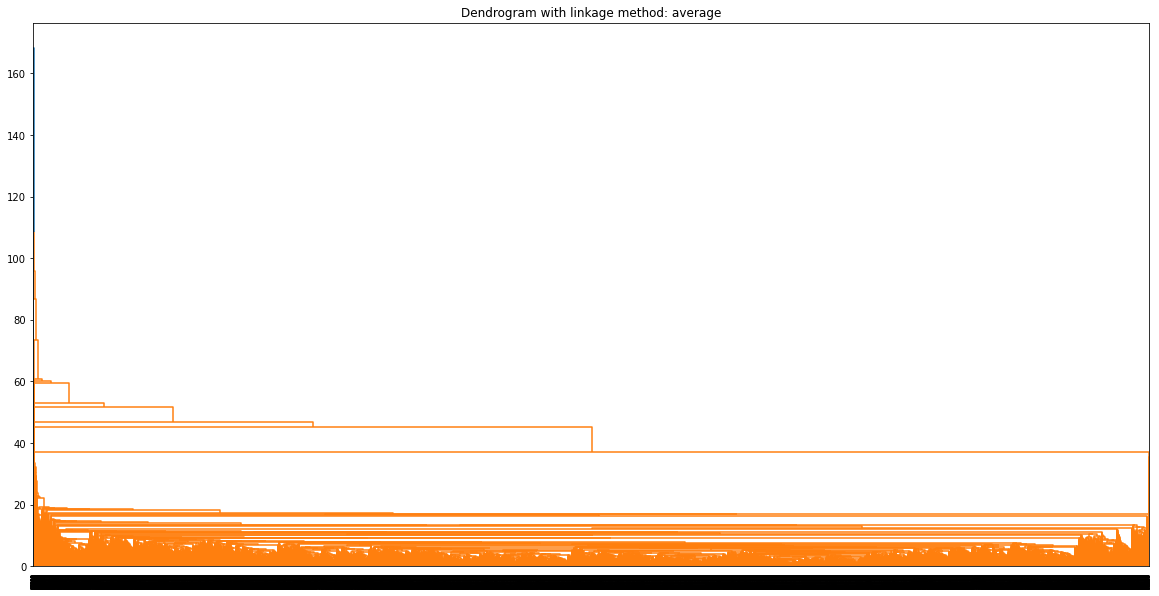

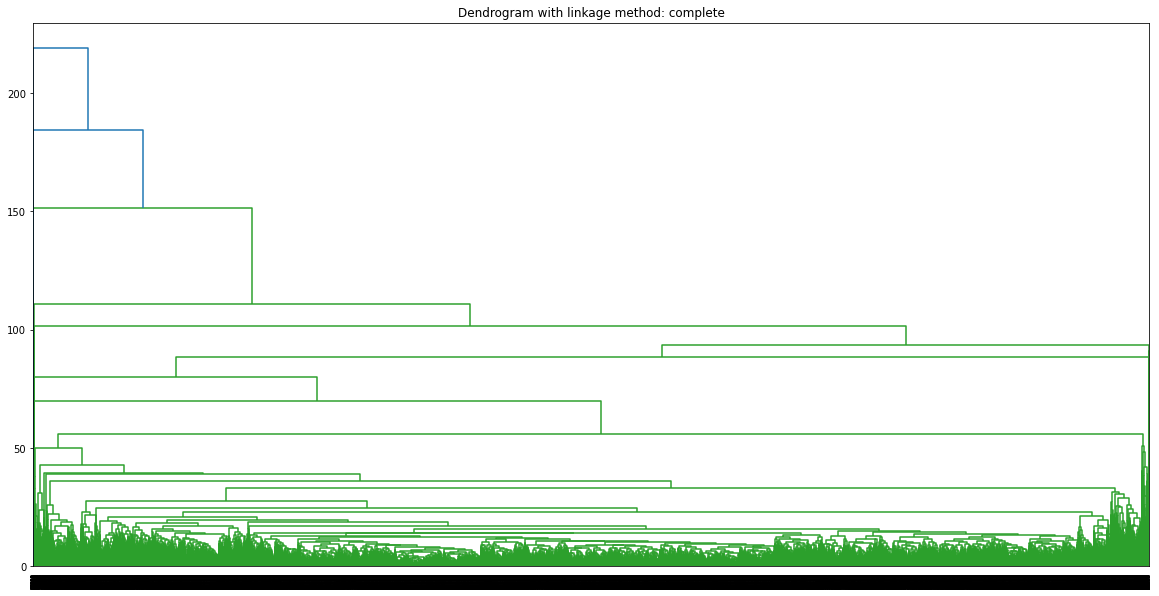

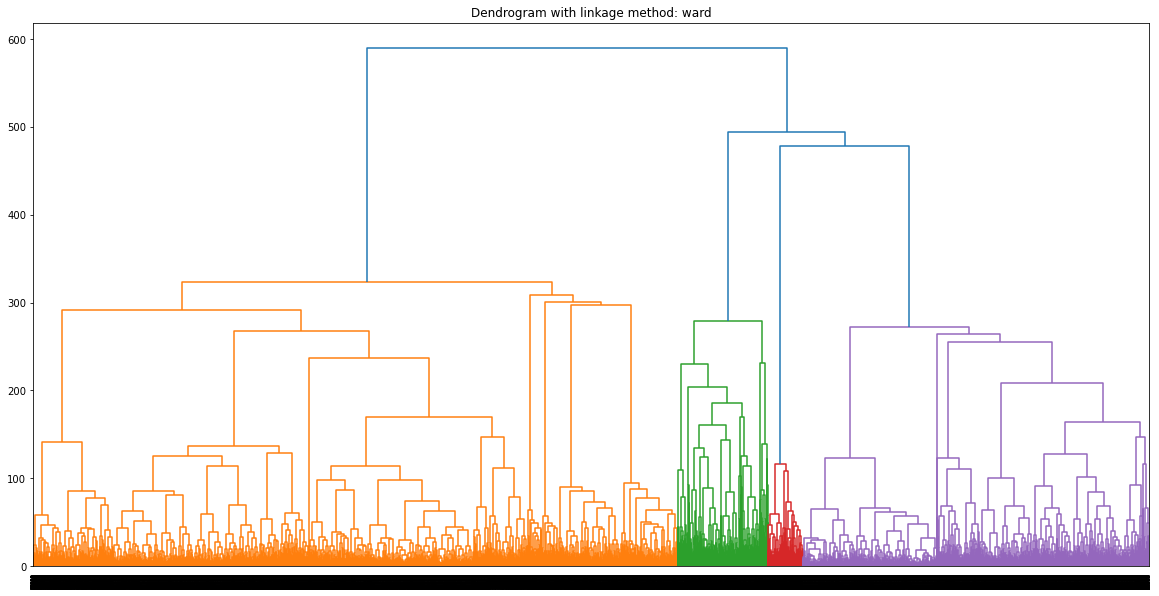

In [55]:
agg_opt()

In [11]:
agg_test('ward', 3)

AUPRC score: 0.29
Silhouette score: 0.25
ARI score: 0.00


In [56]:
#seperate the target variable from the rest
y = model['Churn']
X = model.drop(['Churn'], 1)
#reset the data
X = scaler.fit_transform(X)


Perplexity: 5


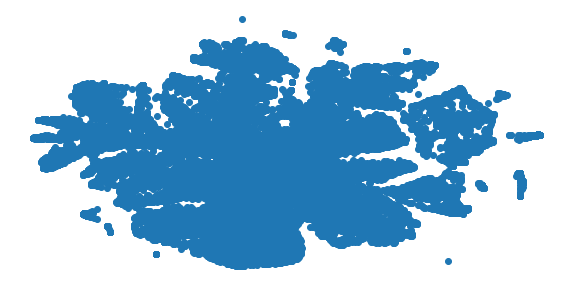

Total time: 71.12382411956787 seconds.

Perplexity: 10


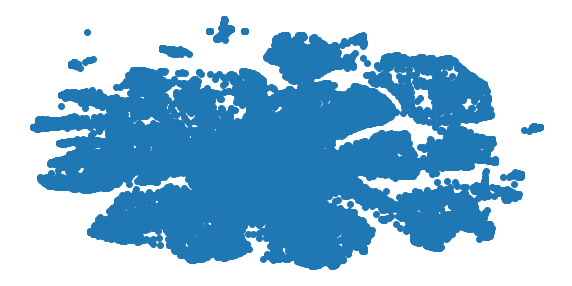

Total time: 68.05307483673096 seconds.

Perplexity: 15


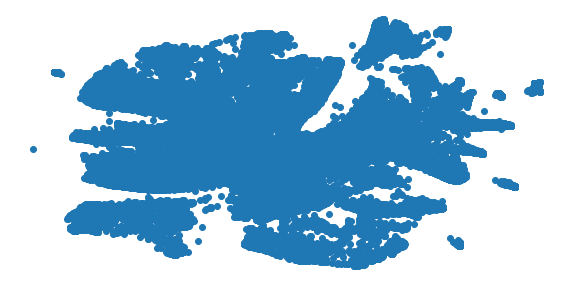

Total time: 80.0108711719513 seconds.

Perplexity: 20


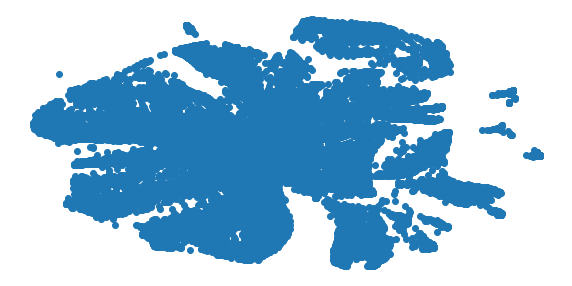

Total time: 64.17851781845093 seconds.

Perplexity: 25


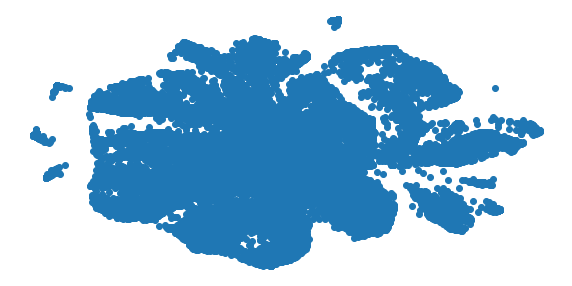

Total time: 80.13175010681152 seconds.

Perplexity: 30


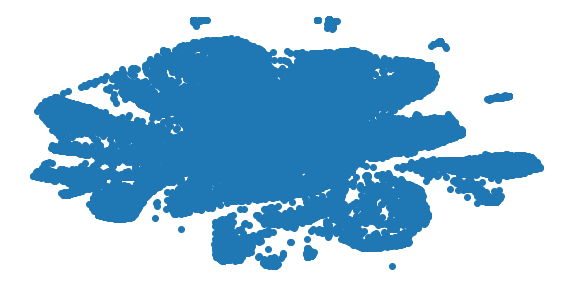

Total time: 76.73258233070374 seconds.

Perplexity: 35


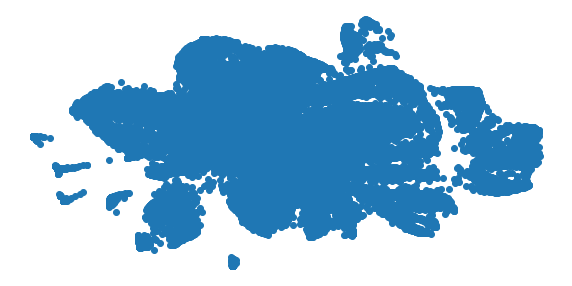

Total time: 83.92857837677002 seconds.

Perplexity: 40


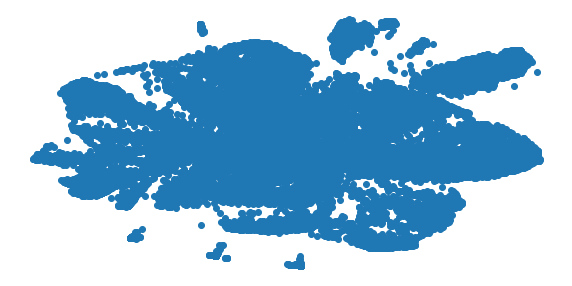

Total time: 87.75617814064026 seconds.

Perplexity: 45


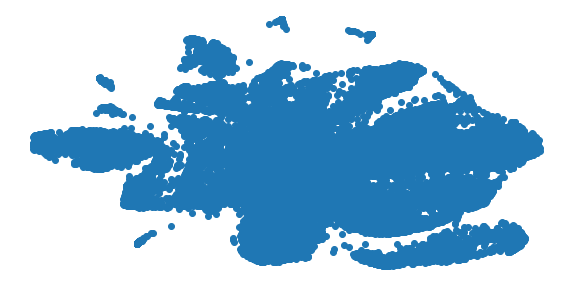

Total time: 89.60345983505249 seconds.

Perplexity: 50


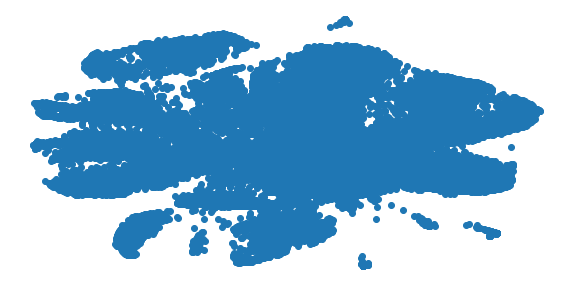

Total time: 93.73782896995544 seconds.


In [57]:
for i in range(1, 11):
    t0 = time.time()
    print('\nPerplexity: {}'.format(i*5))
    tsne_test(2, i*5)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.'.format(total))


Perplexity: 5


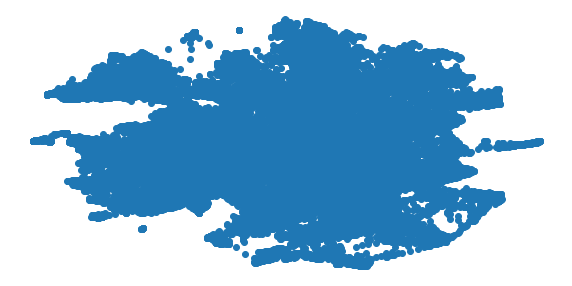

Total time: 114.07922959327698 seconds.

Perplexity: 10


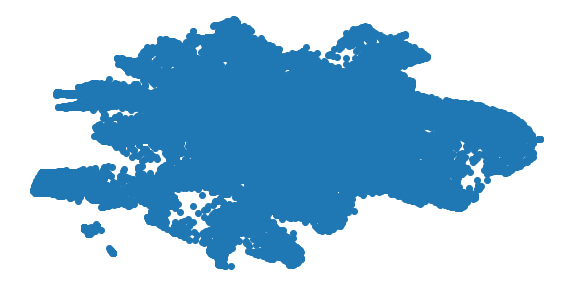

Total time: 135.90712094306946 seconds.

Perplexity: 15


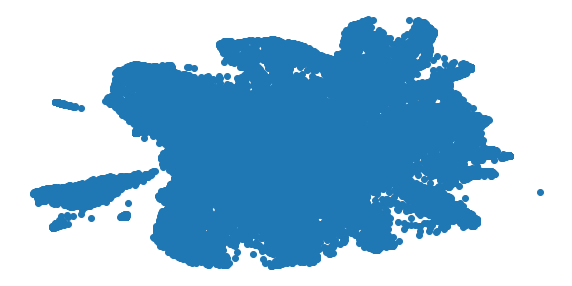

Total time: 138.20961356163025 seconds.

Perplexity: 20


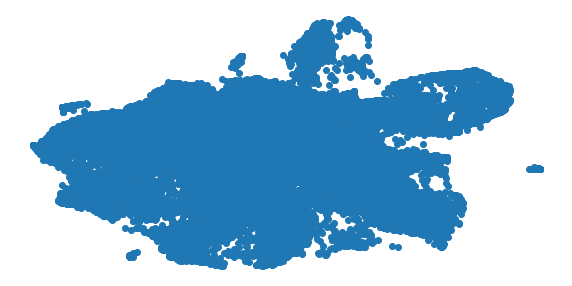

Total time: 123.22827792167664 seconds.

Perplexity: 25


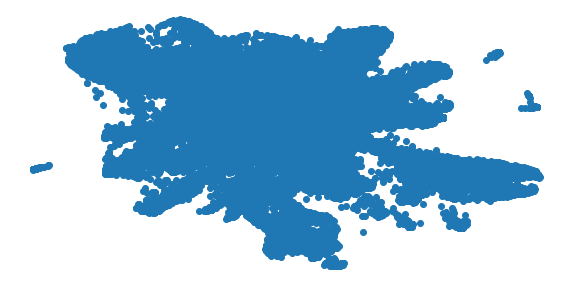

Total time: 123.4169397354126 seconds.

Perplexity: 30


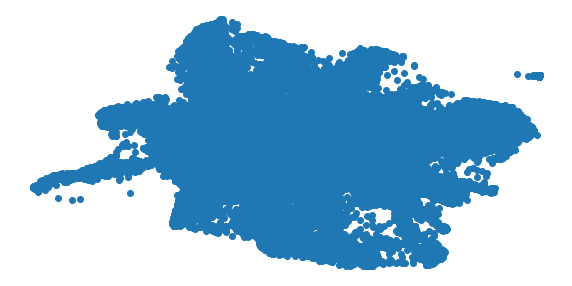

Total time: 125.44122099876404 seconds.

Perplexity: 35


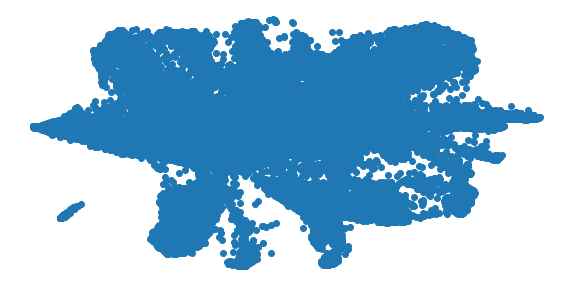

Total time: 138.35931515693665 seconds.

Perplexity: 40


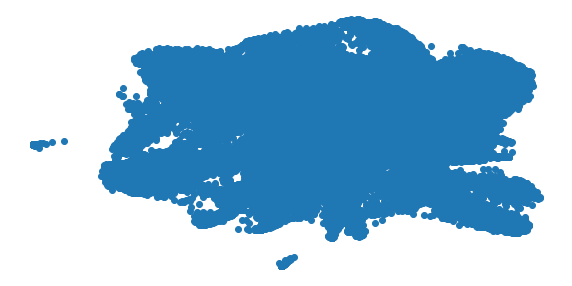

Total time: 127.0666069984436 seconds.

Perplexity: 45


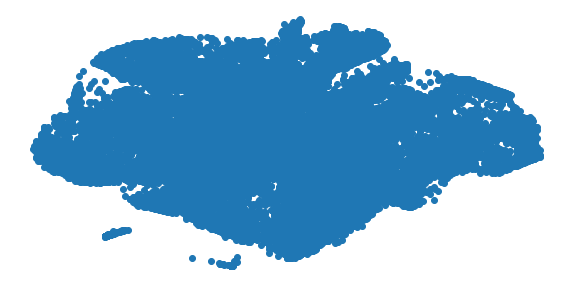

Total time: 133.37556099891663 seconds.

Perplexity: 50


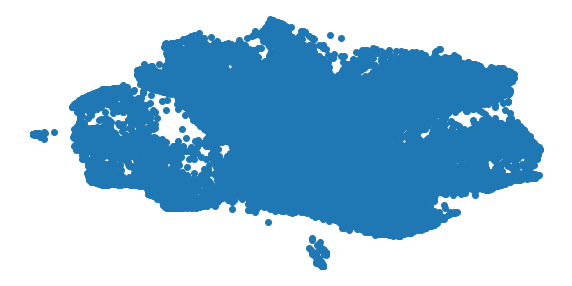

Total time: 132.17289233207703 seconds.


In [58]:
for i in range(1, 11):
    t0 = time.time()
    print('\nPerplexity: {}'.format(i*5))
    tsne_test(3, i*5)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.'.format(total))

In [15]:
#transform the data with tSNE
t0 = time.time()
tsne = TSNE(n_components=3, verbose=0, perplexity=35, n_iter=300, n_jobs=-1)
X = tsne.fit_transform(X)
t1 = time.time()
total = t1-t0
print('Total time: {} seconds.'.format(total))

Total time: 133.70230102539062 seconds.


In [61]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    kmeans_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.24
ARI score: 0.00

Number of clusters: 3
AUPRC score: 0.28
Silhouette score: 0.25
ARI score: 0.00

Number of clusters: 4
AUPRC score: 0.29
Silhouette score: 0.26
ARI score: -0.00

Number of clusters: 5
AUPRC score: 0.29
Silhouette score: 0.27
ARI score: 0.00

Number of clusters: 6
AUPRC score: 0.28
Silhouette score: 0.28
ARI score: 0.00

Number of clusters: 7
AUPRC score: 0.29
Silhouette score: 0.28
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.28
Silhouette score: 0.28
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.28
Silhouette score: 0.29
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.29
Silhouette score: 0.28
ARI score: -0.00


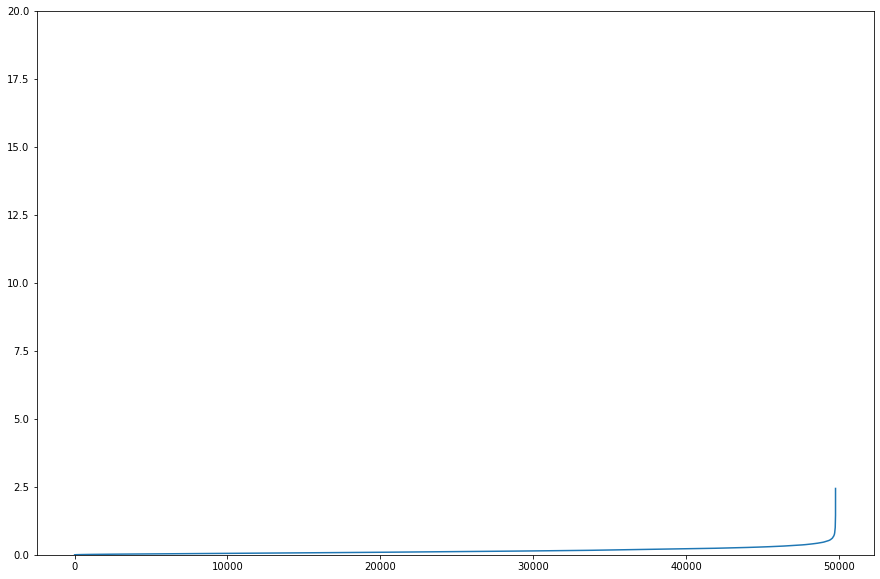

In [62]:
dbscan_opt(2)

In [63]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    gmm_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.24
ARI score: 0.00

Number of clusters: 3
AUPRC score: 0.28
Silhouette score: 0.23
ARI score: -0.00

Number of clusters: 4
AUPRC score: 0.29
Silhouette score: 0.25
ARI score: 0.00

Number of clusters: 5
AUPRC score: 0.28
Silhouette score: 0.25
ARI score: 0.00

Number of clusters: 6
AUPRC score: 0.29
Silhouette score: 0.26
ARI score: -0.00

Number of clusters: 7
AUPRC score: 0.28
Silhouette score: 0.26
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.29
Silhouette score: 0.24
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.29
Silhouette score: 0.26
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.29
Silhouette score: 0.24
ARI score: 0.00


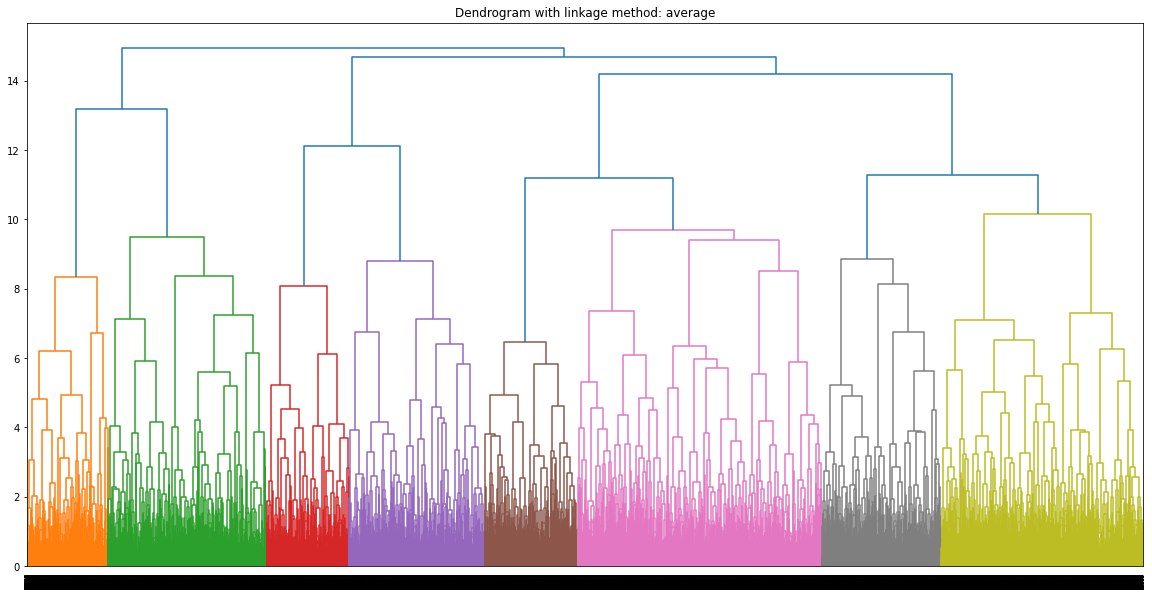

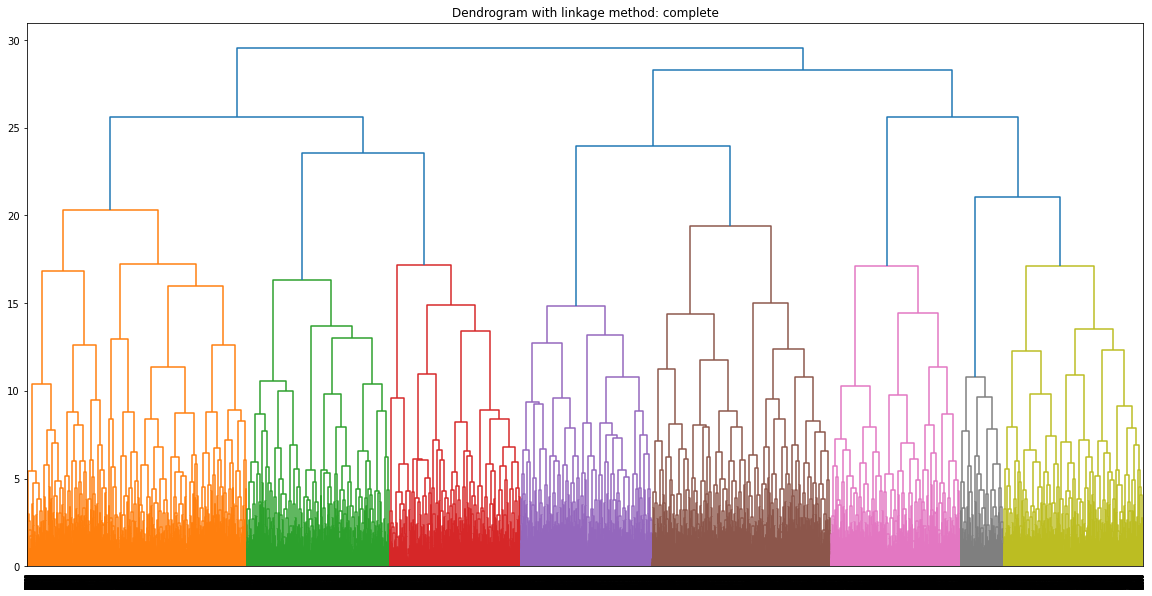

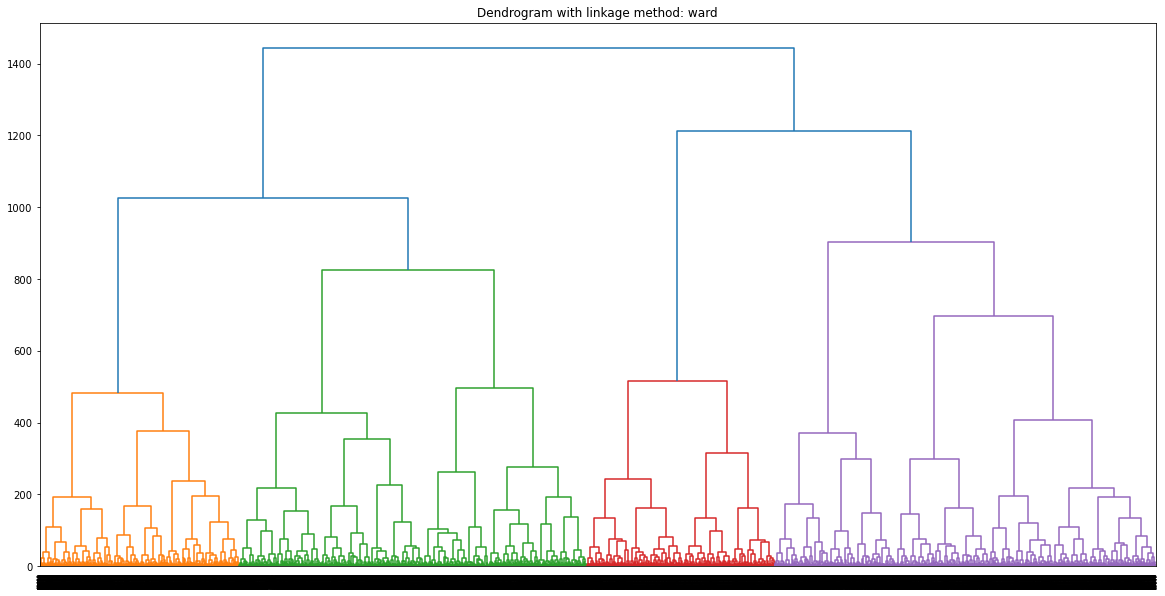

In [64]:
agg_opt()

In [17]:
for i in range(1, 11):
    t0 = time.time()
    dbscan_test(0.4,i*50)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.\n'.format(total))

AUPRC score: 0.28
Silhouette score: -0.03
ARI score: 0.02
Total time: 32.16818642616272 seconds.

AUPRC score: 0.28
Silhouette score: 0.20
ARI score: 0.00
Total time: 30.7414391040802 seconds.

AUPRC score: 0.28
Silhouette score: 0.31
ARI score: 0.00
Total time: 30.550663948059082 seconds.

AUPRC score: 0.29
Silhouette score: 0.32
ARI score: 0.00
Total time: 30.40437626838684 seconds.

AUPRC score: 0.28
Silhouette score: 0.29
ARI score: 0.00
Total time: 30.713847637176514 seconds.

AUPRC score: 0.28
Silhouette score: 0.24
ARI score: 0.01
Total time: 30.78052306175232 seconds.

AUPRC score: 0.29
Silhouette score: 0.19
ARI score: 0.01
Total time: 30.997825622558594 seconds.

AUPRC score: 0.29
Silhouette score: 0.10
ARI score: 0.01
Total time: 31.31352663040161 seconds.

AUPRC score: 0.29
Silhouette score: -0.01
ARI score: 0.01
Total time: 31.776259899139404 seconds.

AUPRC score: 0.29
Silhouette score: -0.10
ARI score: 0.02
Total time: 33.07059454917908 seconds.



In [20]:
agg_test('ward', 7)

AUPRC score: 0.29
Silhouette score: 0.29
ARI score: 0.00


In [12]:
#seperate the target variable from the rest
y = model['Churn']
X = model.drop(['Churn'], 1)
#reset the data
X = scaler.fit_transform(X)

Parameters: 10, 0.2


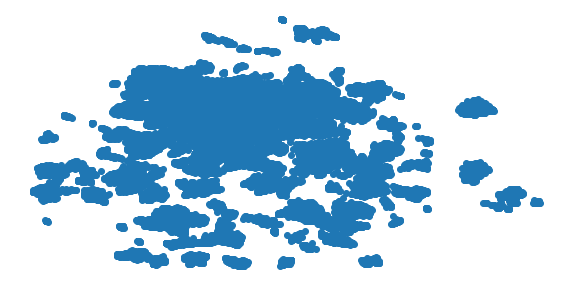

Total time: 11.103703498840332 seconds.

Parameters: 10, 0.30000000000000004


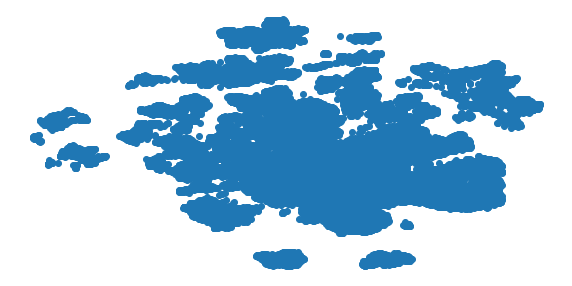

Total time: 10.514237403869629 seconds.

Parameters: 10, 0.4


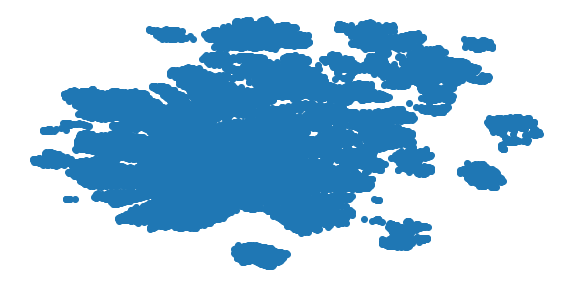

Total time: 10.906982183456421 seconds.

Parameters: 10, 0.5


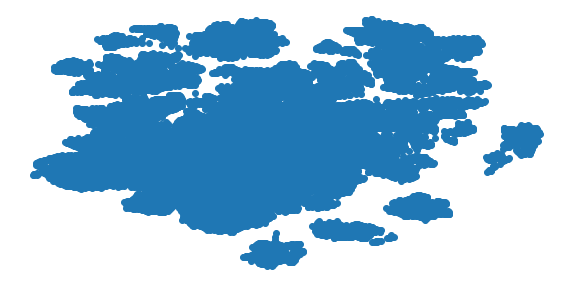

Total time: 10.490540027618408 seconds.

Parameters: 10, 0.6000000000000001


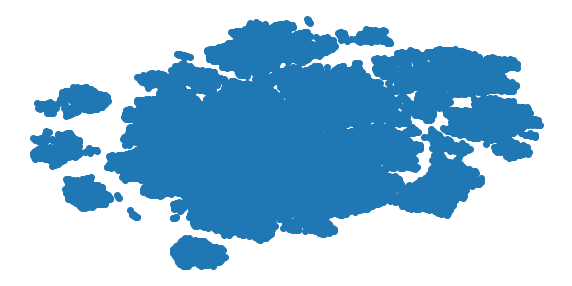

Total time: 11.283834457397461 seconds.

Parameters: 10, 0.7000000000000001


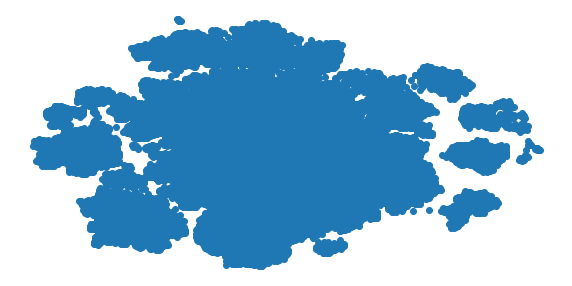

Total time: 10.961416482925415 seconds.

Parameters: 10, 0.8


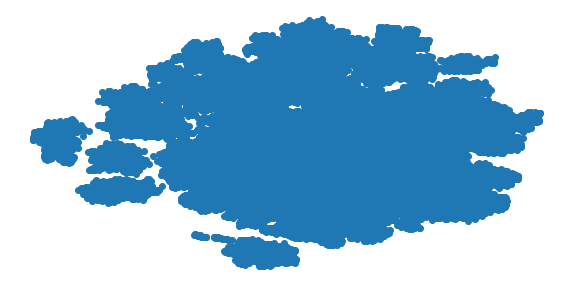

Total time: 11.130241394042969 seconds.

Parameters: 10, 0.9


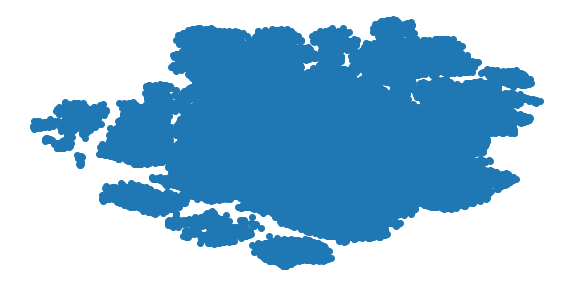

Total time: 10.758601188659668 seconds.

Parameters: 10, 1.0


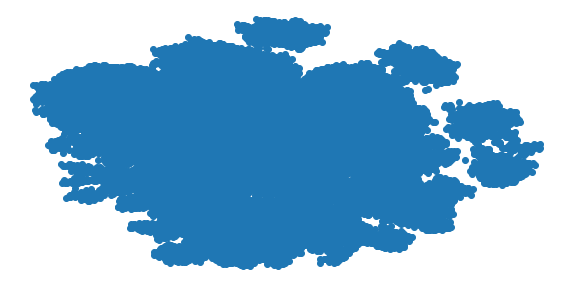

Total time: 11.174861192703247 seconds.

Parameters: 15, 0.2


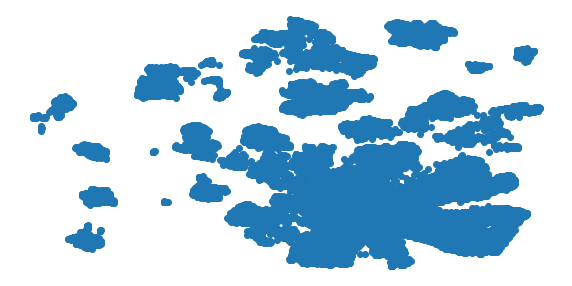

Total time: 12.463467121124268 seconds.

Parameters: 15, 0.30000000000000004


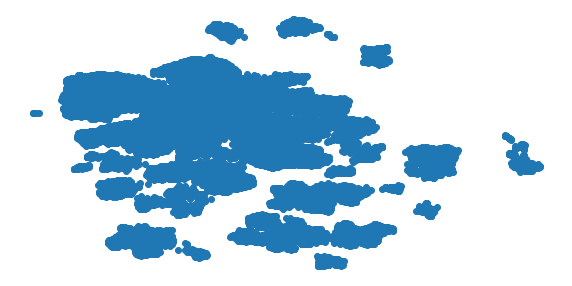

Total time: 12.90539288520813 seconds.

Parameters: 15, 0.4


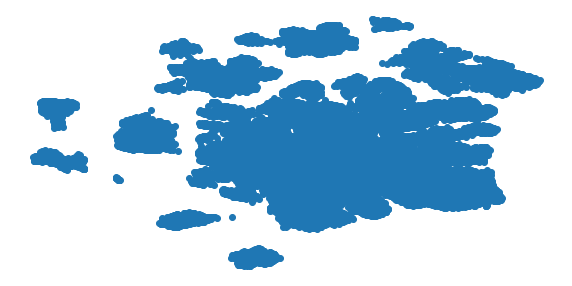

Total time: 12.354096412658691 seconds.

Parameters: 15, 0.5


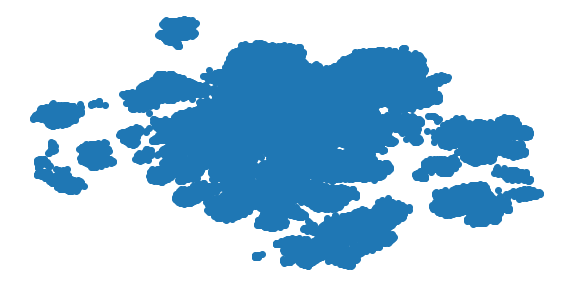

Total time: 12.911089897155762 seconds.

Parameters: 15, 0.6000000000000001


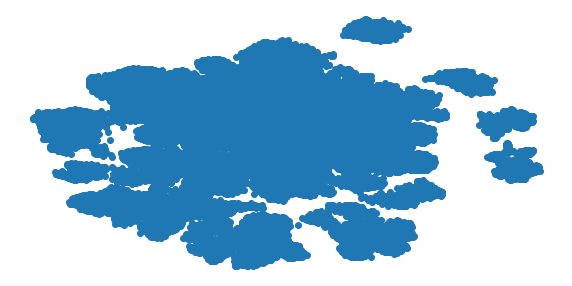

Total time: 12.404778957366943 seconds.

Parameters: 15, 0.7000000000000001


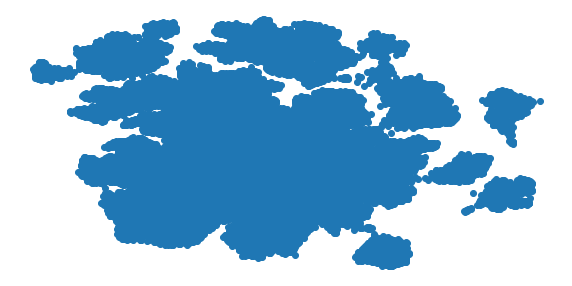

Total time: 13.169655799865723 seconds.

Parameters: 15, 0.8


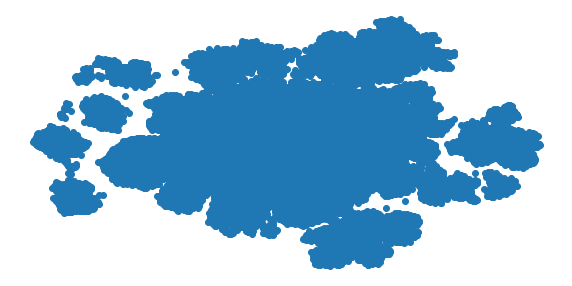

Total time: 12.56543254852295 seconds.

Parameters: 15, 0.9


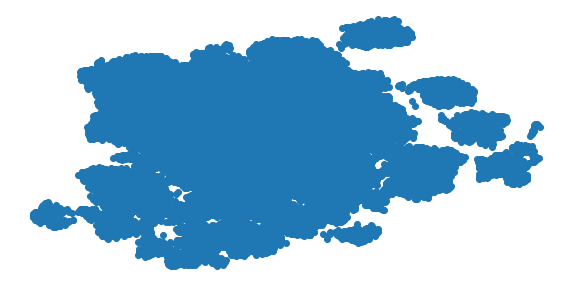

Total time: 13.576630115509033 seconds.

Parameters: 15, 1.0


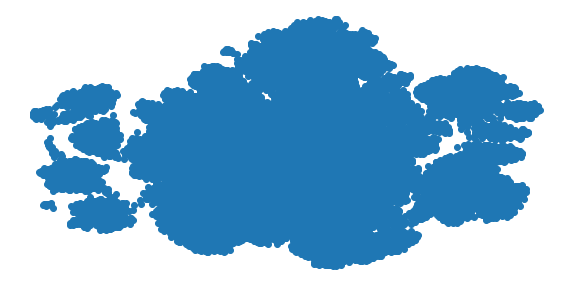

Total time: 12.508415937423706 seconds.

Parameters: 20, 0.2


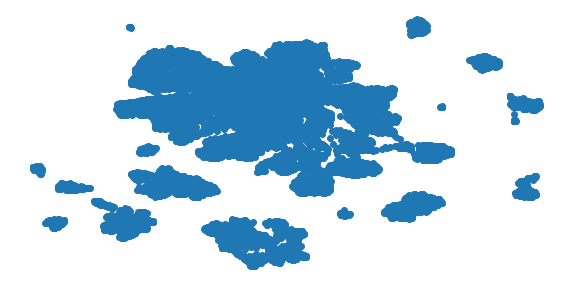

Total time: 14.968894243240356 seconds.

Parameters: 20, 0.30000000000000004


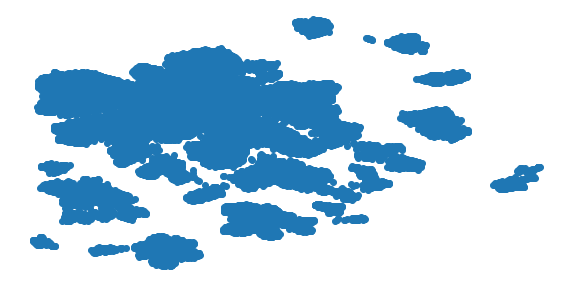

Total time: 14.069355010986328 seconds.

Parameters: 20, 0.4


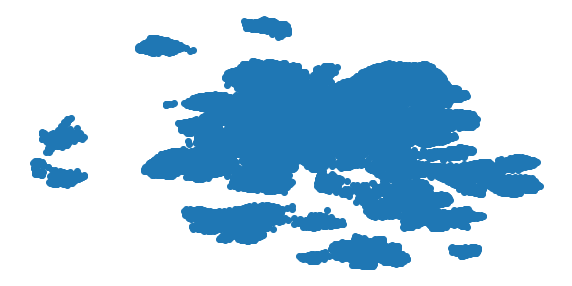

Total time: 14.620051622390747 seconds.

Parameters: 20, 0.5


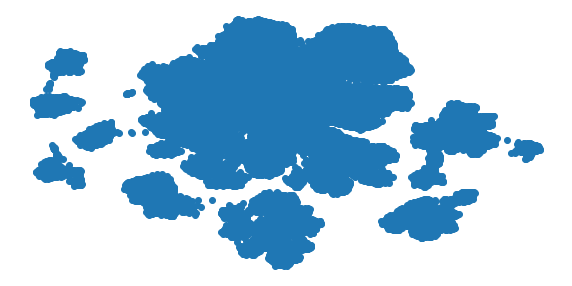

Total time: 14.321628093719482 seconds.

Parameters: 20, 0.6000000000000001


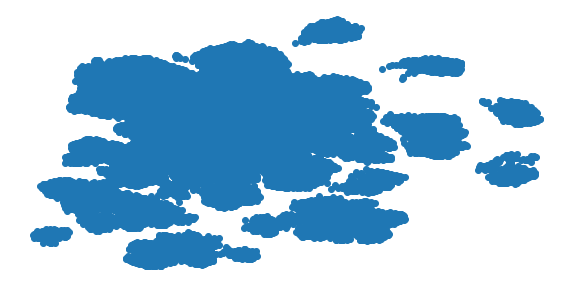

Total time: 14.18127179145813 seconds.

Parameters: 20, 0.7000000000000001


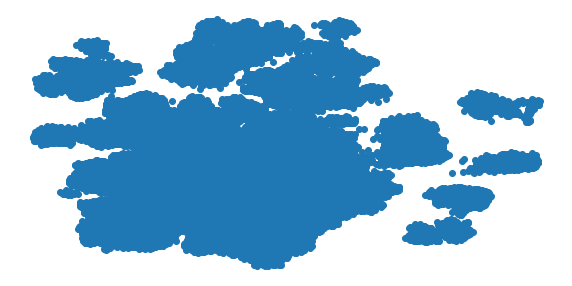

Total time: 13.39213252067566 seconds.

Parameters: 20, 0.8


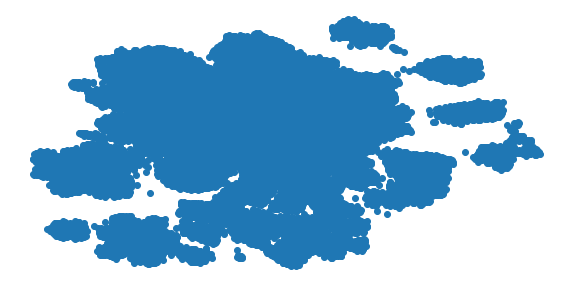

Total time: 14.338965654373169 seconds.

Parameters: 20, 0.9


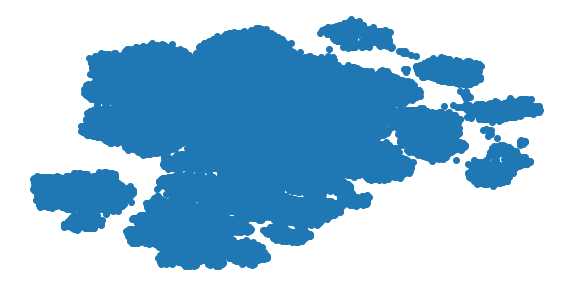

Total time: 14.069597482681274 seconds.

Parameters: 20, 1.0


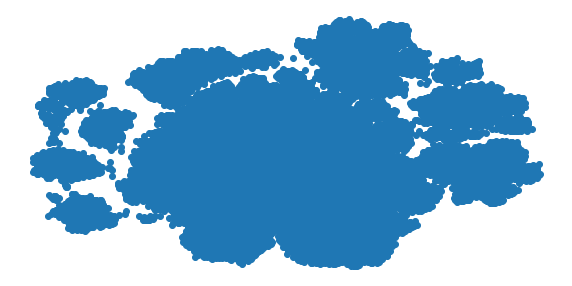

Total time: 14.973647356033325 seconds.

Parameters: 25, 0.2


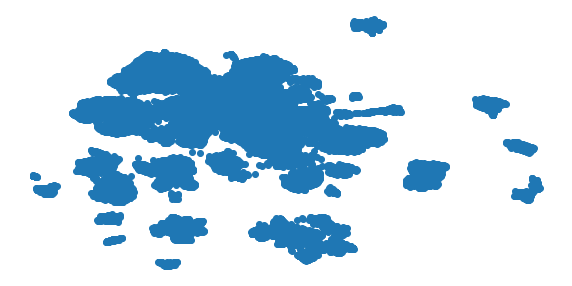

Total time: 15.922831058502197 seconds.

Parameters: 25, 0.30000000000000004


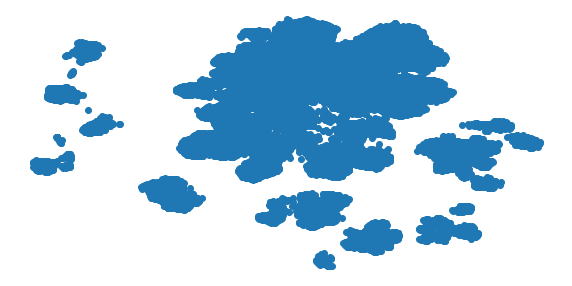

Total time: 15.880820989608765 seconds.

Parameters: 25, 0.4


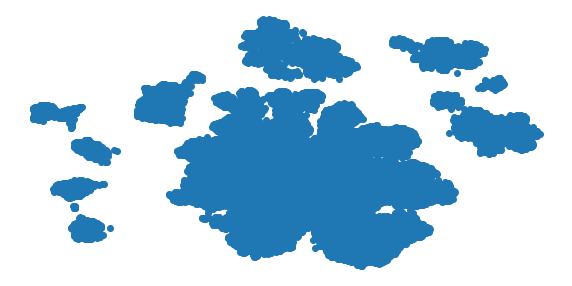

Total time: 15.94460678100586 seconds.

Parameters: 25, 0.5


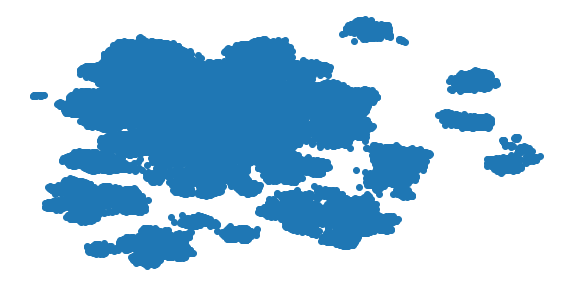

Total time: 16.01625943183899 seconds.

Parameters: 25, 0.6000000000000001


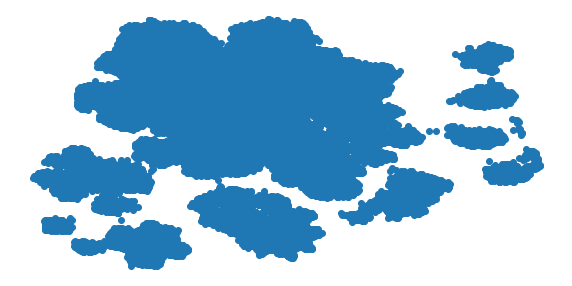

Total time: 15.910798788070679 seconds.

Parameters: 25, 0.7000000000000001


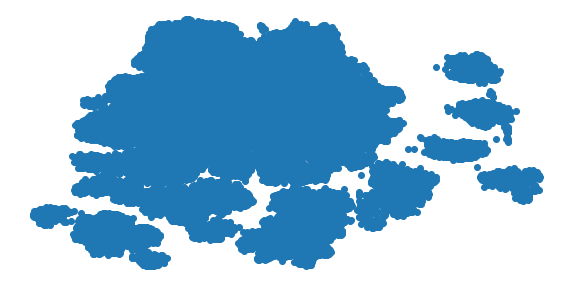

Total time: 16.517252206802368 seconds.

Parameters: 25, 0.8


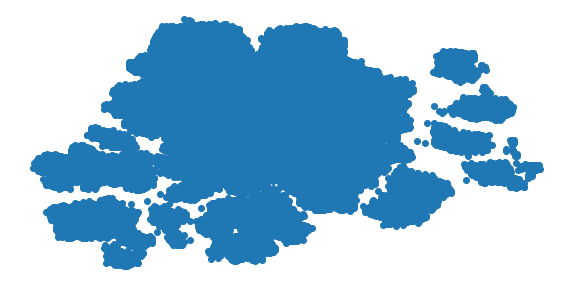

Total time: 15.879581689834595 seconds.

Parameters: 25, 0.9


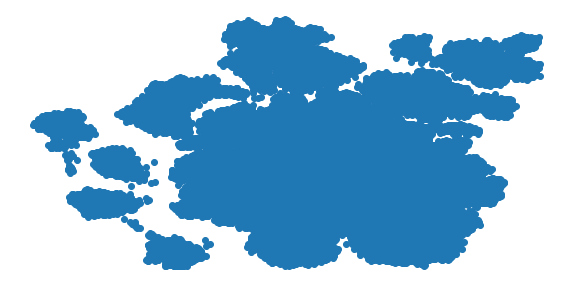

Total time: 16.281156301498413 seconds.

Parameters: 25, 1.0


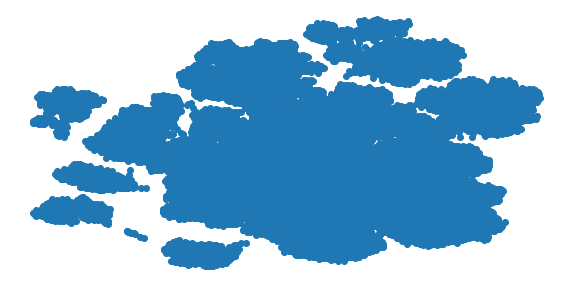

Total time: 14.957031965255737 seconds.

Parameters: 30, 0.2


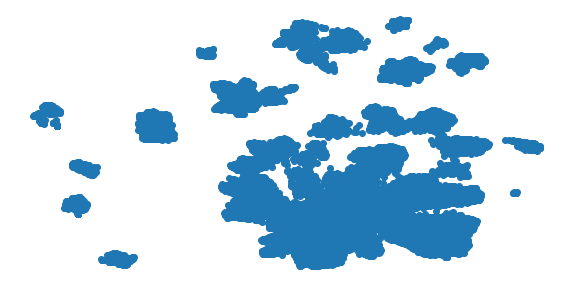

Total time: 15.110576391220093 seconds.

Parameters: 30, 0.30000000000000004


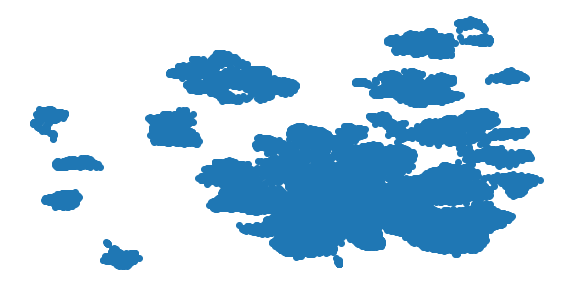

Total time: 14.834432601928711 seconds.

Parameters: 30, 0.4


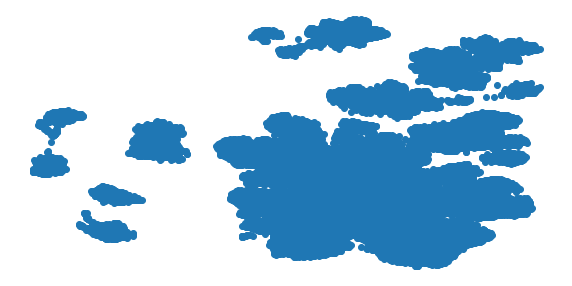

Total time: 15.345549583435059 seconds.

Parameters: 30, 0.5


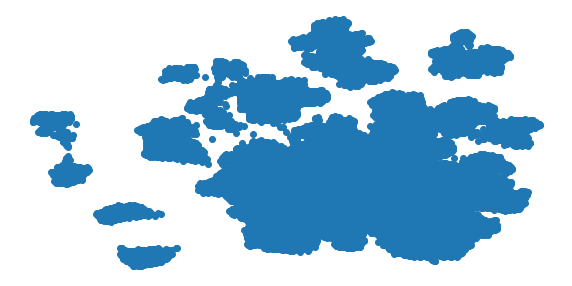

Total time: 3619.4559223651886 seconds.

Parameters: 30, 0.6000000000000001


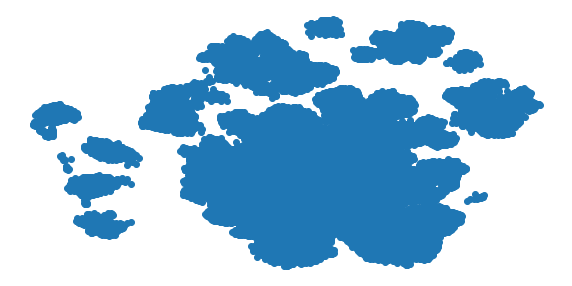

Total time: 15.95208477973938 seconds.

Parameters: 30, 0.7000000000000001


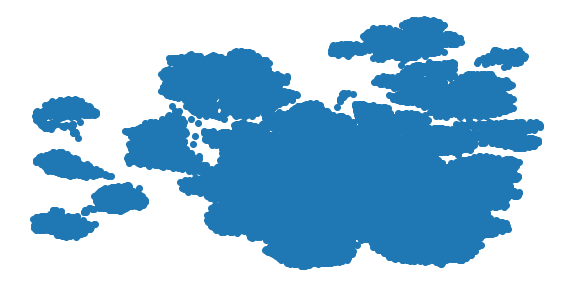

Total time: 15.218618392944336 seconds.

Parameters: 30, 0.8


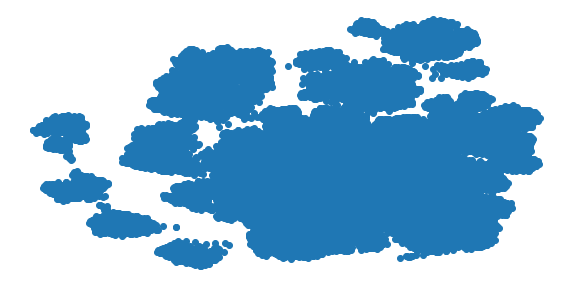

Total time: 15.464165449142456 seconds.

Parameters: 30, 0.9


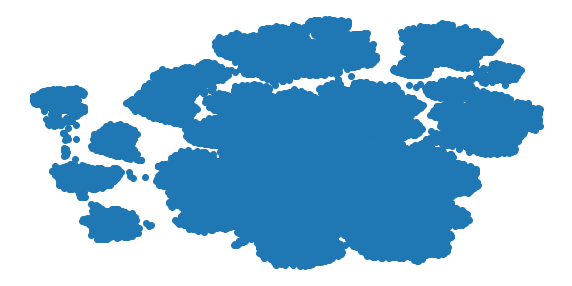

Total time: 15.051658153533936 seconds.

Parameters: 30, 1.0


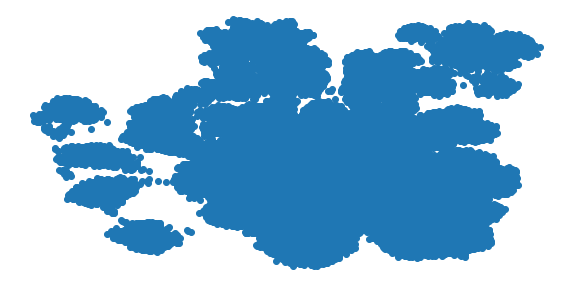

Total time: 17.685139894485474 seconds.

Parameters: 35, 0.2


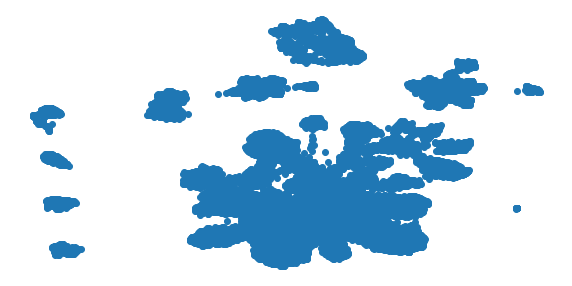

Total time: 16.45295786857605 seconds.

Parameters: 35, 0.30000000000000004


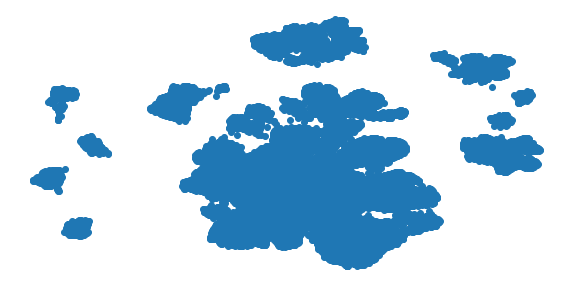

Total time: 17.352776527404785 seconds.

Parameters: 35, 0.4


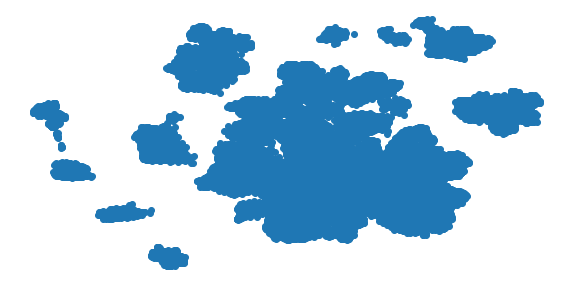

Total time: 16.664934873580933 seconds.

Parameters: 35, 0.5


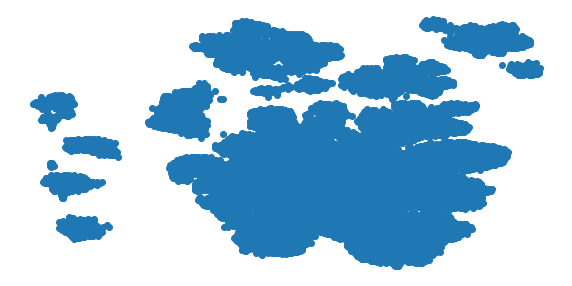

Total time: 16.85183572769165 seconds.

Parameters: 35, 0.6000000000000001


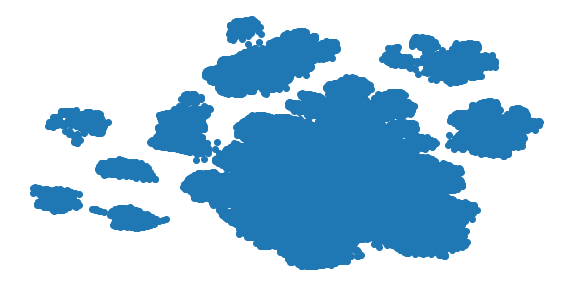

Total time: 16.333447456359863 seconds.

Parameters: 35, 0.7000000000000001


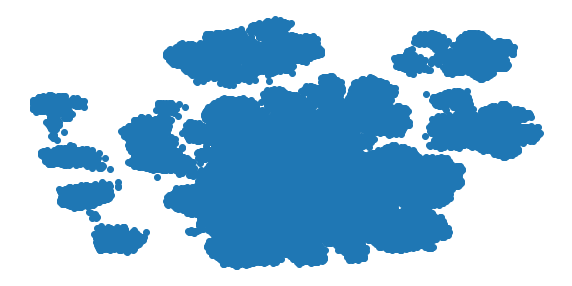

Total time: 16.982264280319214 seconds.

Parameters: 35, 0.8


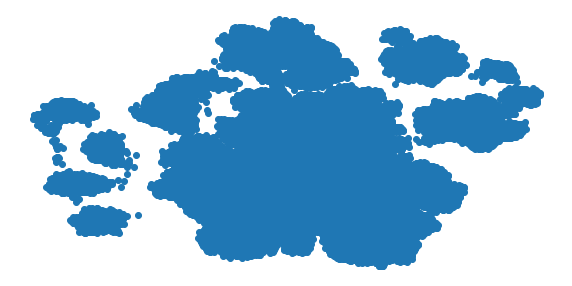

Total time: 16.835668563842773 seconds.

Parameters: 35, 0.9


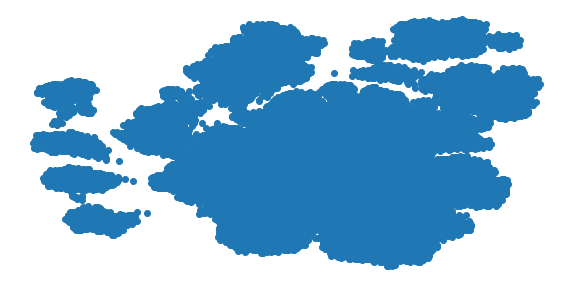

Total time: 17.136139392852783 seconds.

Parameters: 35, 1.0


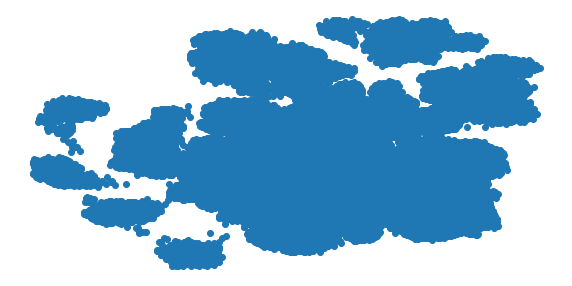

Total time: 16.62636089324951 seconds.

Parameters: 40, 0.2


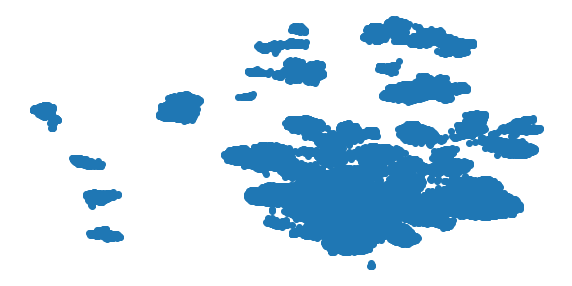

Total time: 19.18902277946472 seconds.

Parameters: 40, 0.30000000000000004


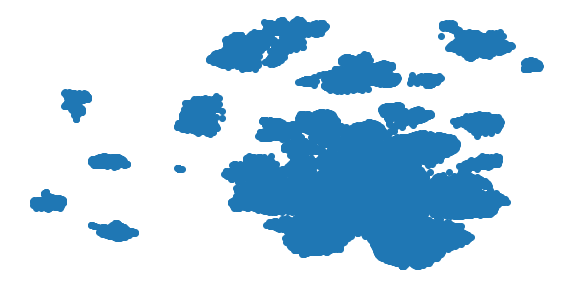

Total time: 19.200549602508545 seconds.

Parameters: 40, 0.4


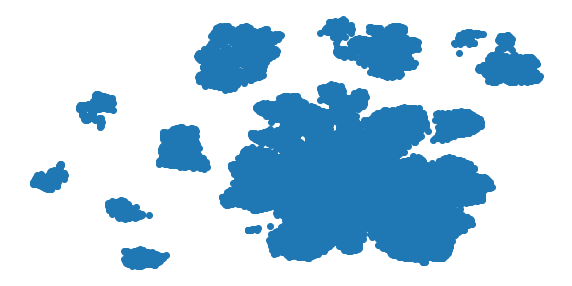

Total time: 19.255603075027466 seconds.

Parameters: 40, 0.5


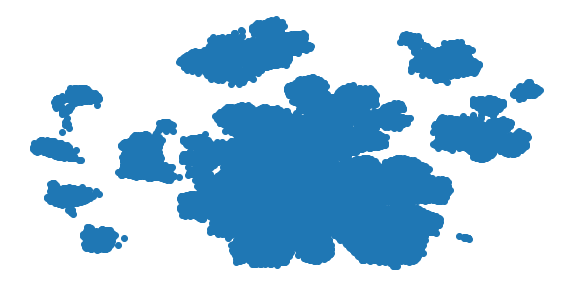

Total time: 18.729772090911865 seconds.

Parameters: 40, 0.6000000000000001


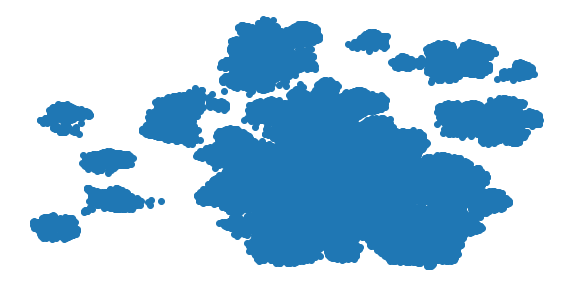

Total time: 19.417100429534912 seconds.

Parameters: 40, 0.7000000000000001


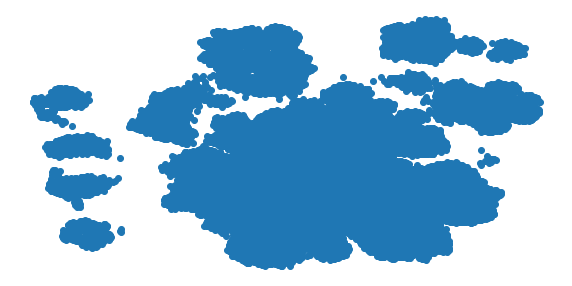

Total time: 18.755300045013428 seconds.

Parameters: 40, 0.8


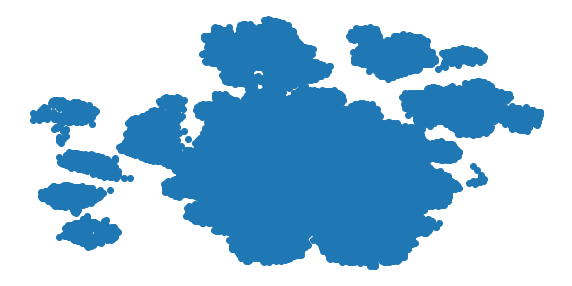

Total time: 19.51530647277832 seconds.

Parameters: 40, 0.9


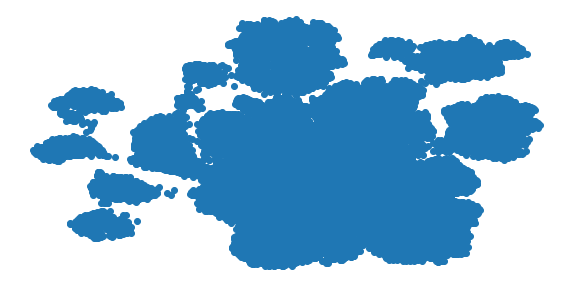

Total time: 18.439713954925537 seconds.

Parameters: 40, 1.0


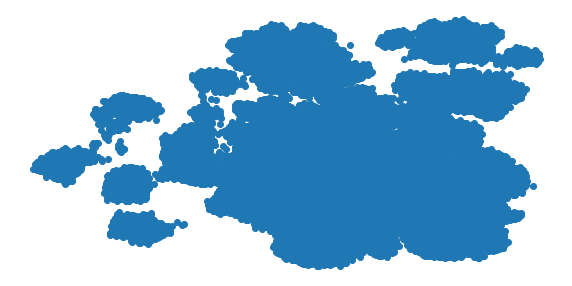

Total time: 18.604109048843384 seconds.

Parameters: 45, 0.2


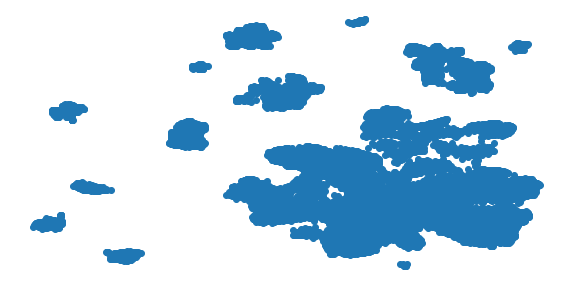

Total time: 20.35182762145996 seconds.

Parameters: 45, 0.30000000000000004


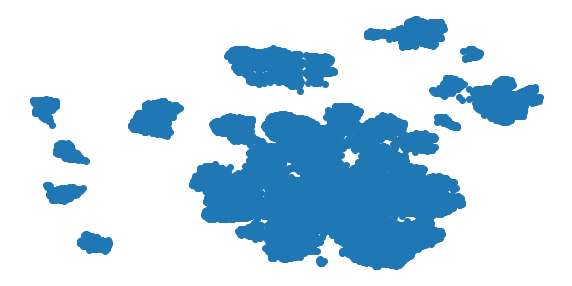

Total time: 21.56377649307251 seconds.

Parameters: 45, 0.4


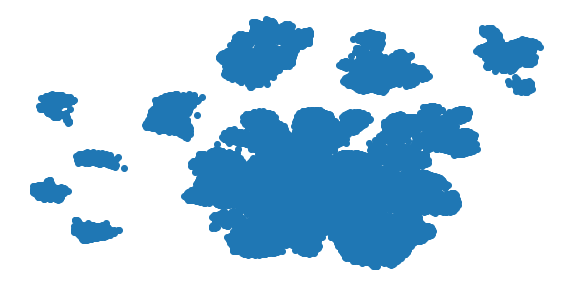

Total time: 20.898587703704834 seconds.

Parameters: 45, 0.5


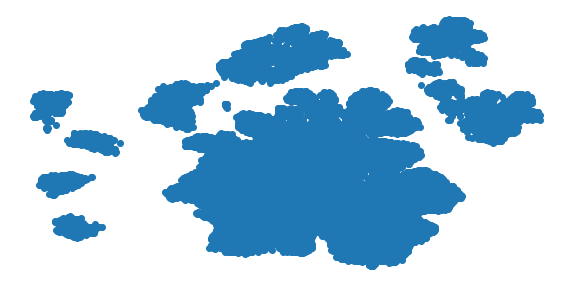

Total time: 21.736503839492798 seconds.

Parameters: 45, 0.6000000000000001


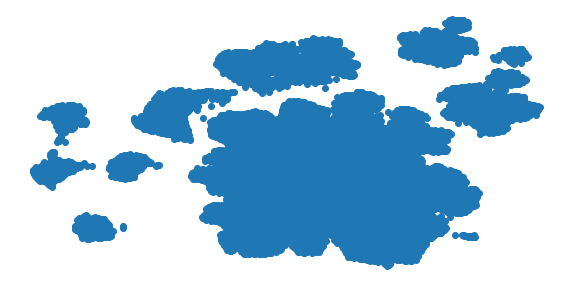

Total time: 21.05644416809082 seconds.

Parameters: 45, 0.7000000000000001


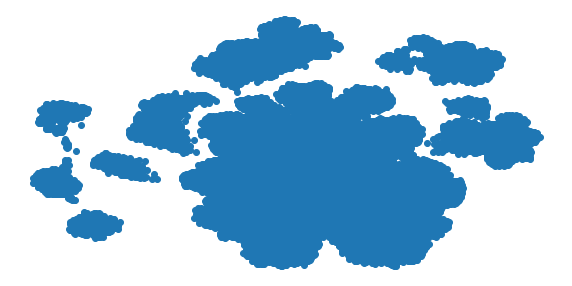

Total time: 21.803866386413574 seconds.

Parameters: 45, 0.8


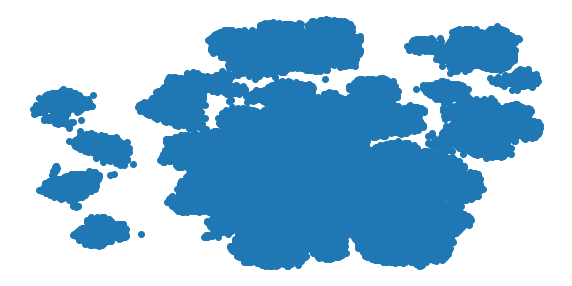

Total time: 21.678074836730957 seconds.

Parameters: 45, 0.9


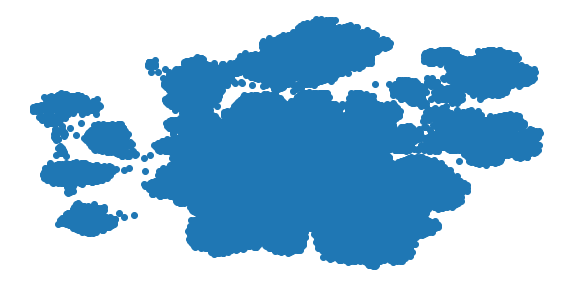

Total time: 21.384944438934326 seconds.

Parameters: 45, 1.0


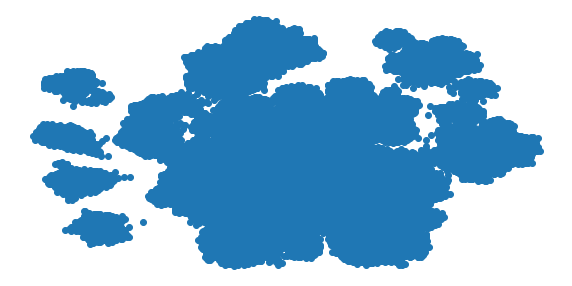

Total time: 20.555946826934814 seconds.

Parameters: 50, 0.2


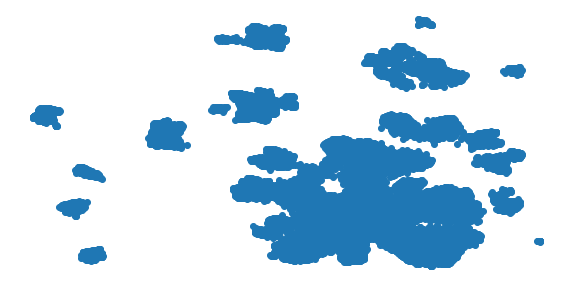

Total time: 23.372456073760986 seconds.

Parameters: 50, 0.30000000000000004


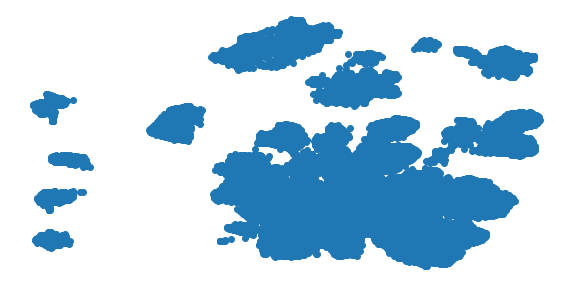

Total time: 22.732444763183594 seconds.

Parameters: 50, 0.4


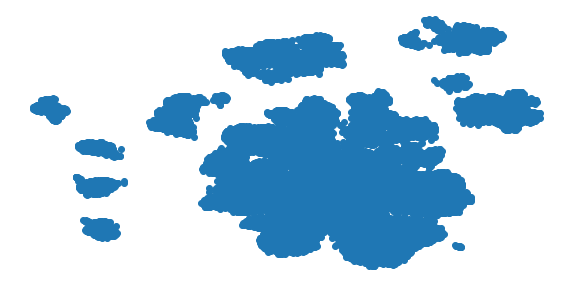

Total time: 23.919135570526123 seconds.

Parameters: 50, 0.5


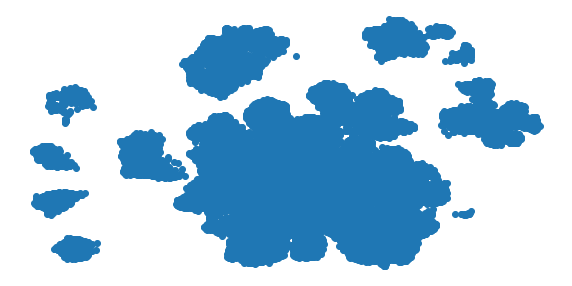

Total time: 24.748227834701538 seconds.

Parameters: 50, 0.6000000000000001


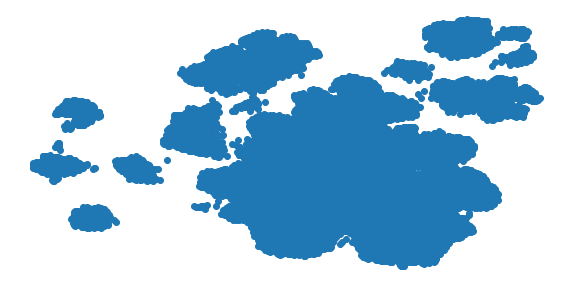

Total time: 25.84646463394165 seconds.

Parameters: 50, 0.7000000000000001


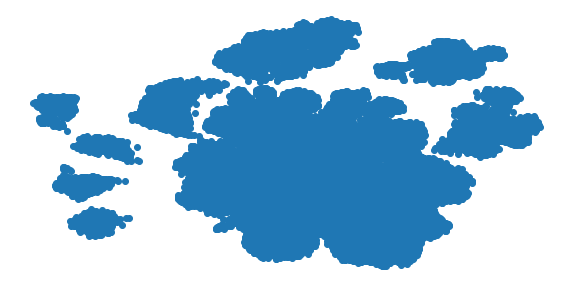

Total time: 25.26959252357483 seconds.

Parameters: 50, 0.8


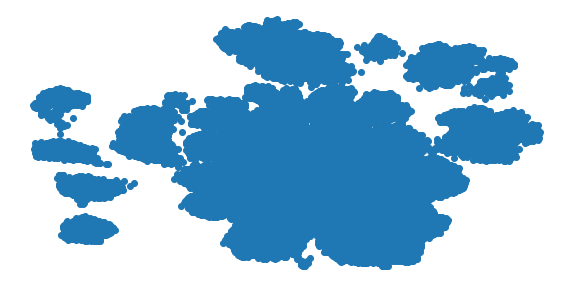

Total time: 25.285228967666626 seconds.

Parameters: 50, 0.9


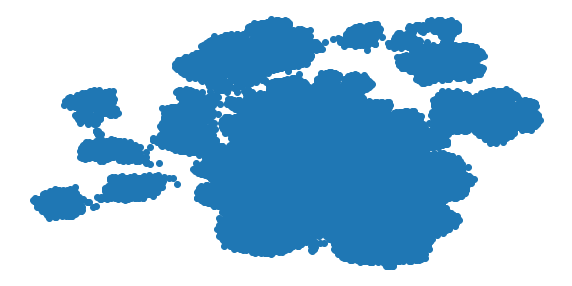

Total time: 24.85089898109436 seconds.

Parameters: 50, 1.0


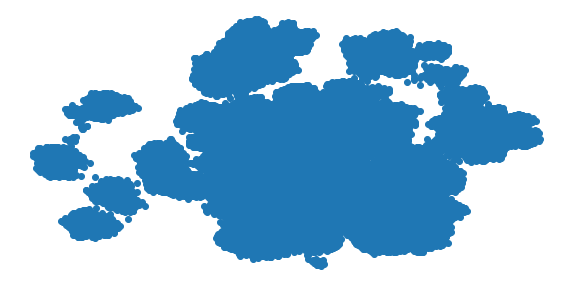

Total time: 23.166071891784668 seconds.



In [15]:
for n in range(2, 11):
    for d in range(2, 11):
        t0 = time.time()
        umap_test(n*5, d*.1)
        t1 = time.time()
        total = t1-t0
        print('Total time: {} seconds.\n'.format(total))

In [16]:
X = umap.UMAP(n_neighbors=50, min_dist=0.4,
                      metric='correlation').fit_transform(X)

In [17]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    kmeans_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.42
ARI score: -0.00

Number of clusters: 3
AUPRC score: 0.28
Silhouette score: 0.42
ARI score: 0.00

Number of clusters: 4
AUPRC score: 0.29
Silhouette score: 0.41
ARI score: 0.01

Number of clusters: 5
AUPRC score: 0.28
Silhouette score: 0.40
ARI score: 0.01

Number of clusters: 6
AUPRC score: 0.30
Silhouette score: 0.40
ARI score: 0.01

Number of clusters: 7
AUPRC score: 0.29
Silhouette score: 0.40
ARI score: 0.01

Number of clusters: 8
AUPRC score: 0.28
Silhouette score: 0.41
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.29
Silhouette score: 0.42
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.28
Silhouette score: 0.43
ARI score: 0.00


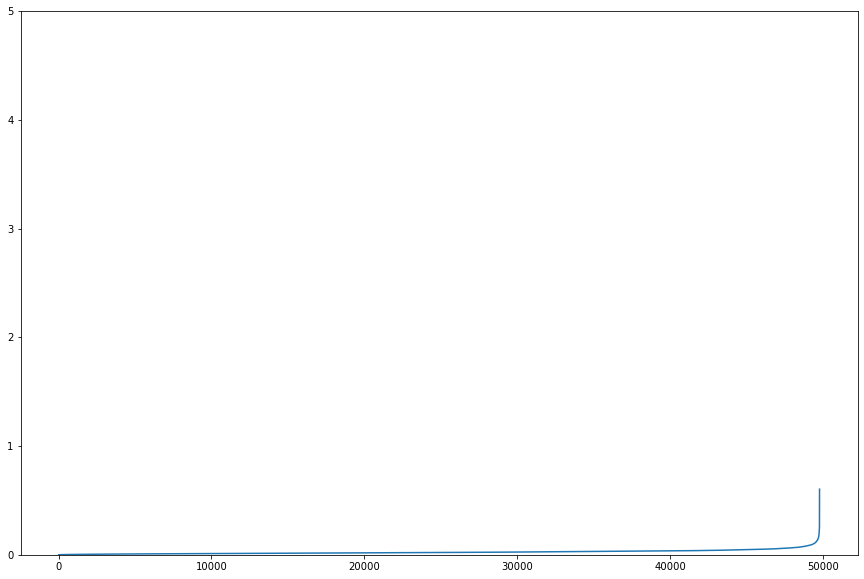

In [21]:
dbscan_opt(2)

In [19]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    gmm_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.38
ARI score: 0.00

Number of clusters: 3
AUPRC score: 0.29
Silhouette score: 0.42
ARI score: 0.01

Number of clusters: 4
AUPRC score: 0.30
Silhouette score: 0.41
ARI score: 0.01

Number of clusters: 5
AUPRC score: 0.30
Silhouette score: 0.39
ARI score: 0.01

Number of clusters: 6
AUPRC score: 0.29
Silhouette score: 0.39
ARI score: 0.01

Number of clusters: 7
AUPRC score: 0.29
Silhouette score: 0.39
ARI score: 0.01

Number of clusters: 8
AUPRC score: 0.28
Silhouette score: 0.36
ARI score: 0.01

Number of clusters: 9
AUPRC score: 0.29
Silhouette score: 0.39
ARI score: 0.01

Number of clusters: 10
AUPRC score: 0.28
Silhouette score: 0.39
ARI score: 0.00


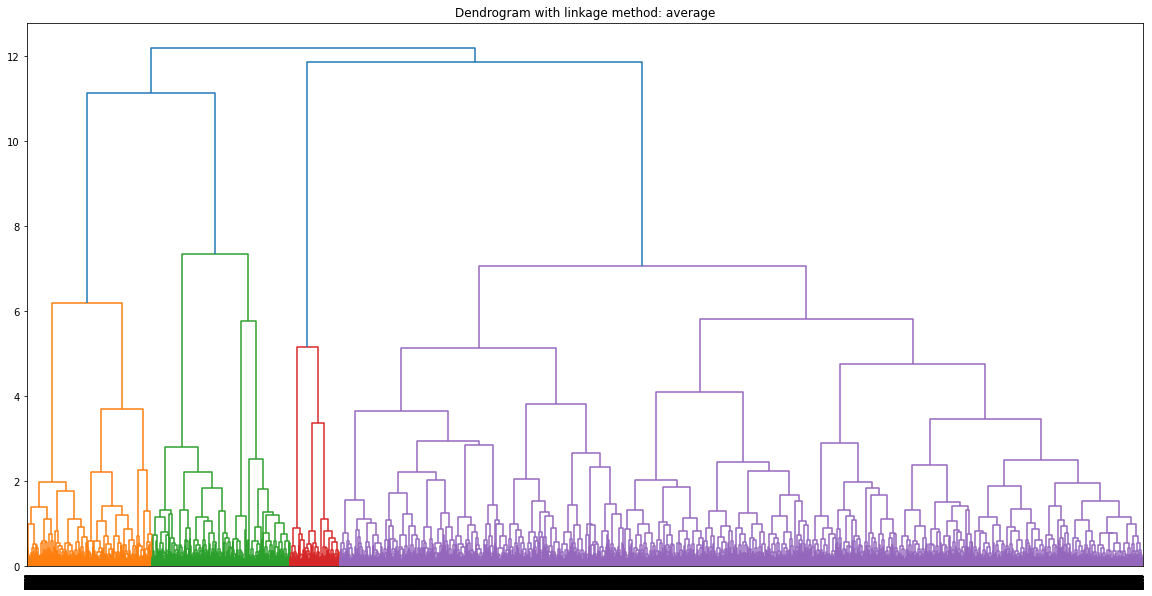

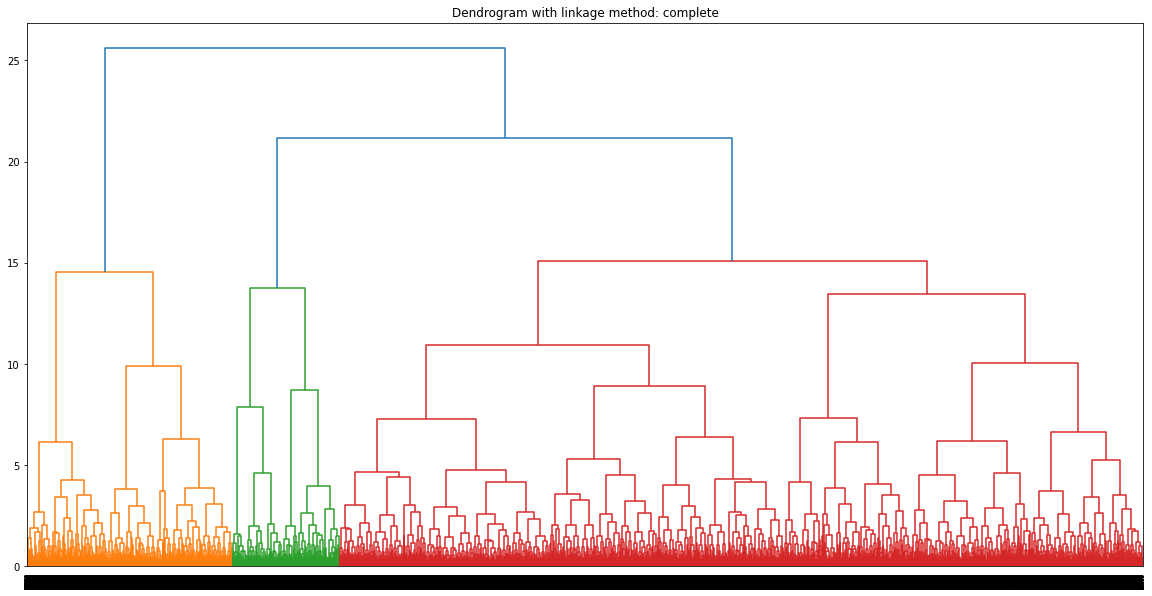

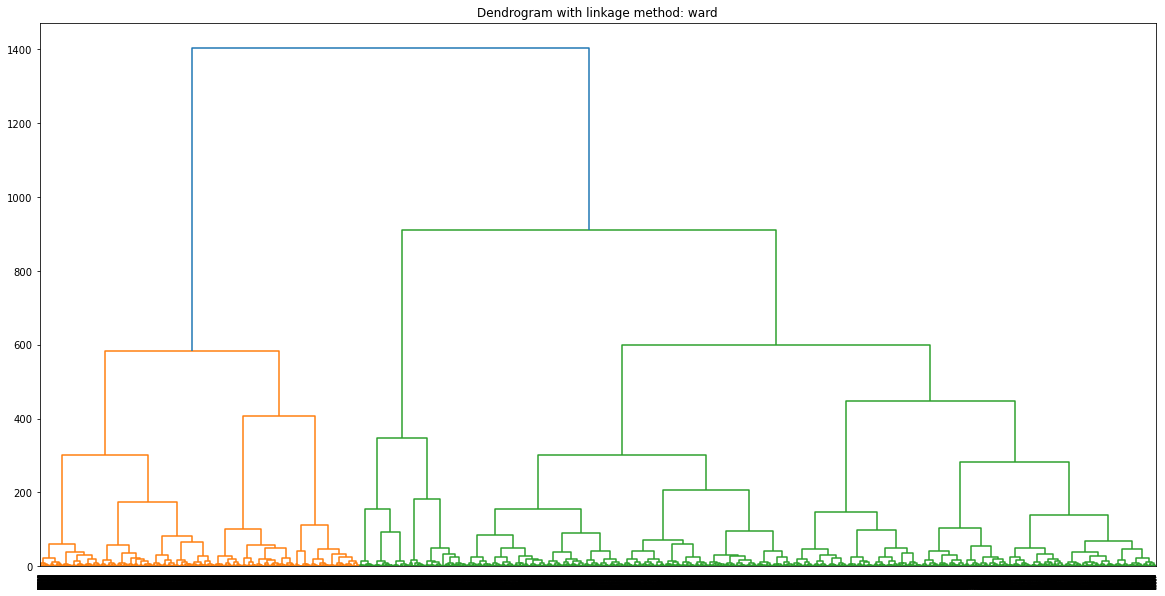

In [22]:
agg_opt()

In [24]:
for i in range(1, 11):
    t0 = time.time()
    dbscan_test(0.2,i*50)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.\n'.format(total))

AUPRC score: 0.29
Silhouette score: 0.08
ARI score: 0.01
Total time: 39.215312004089355 seconds.

AUPRC score: 0.29
Silhouette score: -0.42
ARI score: 0.00
Total time: 40.77237844467163 seconds.

AUPRC score: 0.29
Silhouette score: -0.44
ARI score: -0.00
Total time: 41.60545992851257 seconds.

AUPRC score: 0.29
Silhouette score: 0.24
ARI score: -0.00
Total time: 41.757134437561035 seconds.

AUPRC score: 0.29


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [25]:
agg_test('complete', 7)

AUPRC score: 0.29
Silhouette score: 0.39
ARI score: 0.01


In [26]:
agg_test('ward', 7)

AUPRC score: 0.30
Silhouette score: 0.36
ARI score: 0.00
